In [630]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import re
import copy

In [631]:
%matplotlib inline

In [56]:
os.chdir('Python3Code')

In [63]:
import os
os.getcwd()

'/Users/goran/Programs/mlqf-assignments-2025/ML4QS/Python3Code'

In [632]:
#df = pd.read_csv('intermediate_datafiles/resultsWOactivity_fixTimestamps.csv')
df = pd.read_csv('intermediate_datafiles/16_06_dataset.csv')
#df = pd.read_csv('intermediate_datafiles/16_06_dataset.csv', index_col=0, parse_dates=True)

df.head()

index  acc_z  acc_y  acc_x  gyro_z  gyro_y  gyro_x  \
0  2025-06-10 14:45:56.519009300 -0.031 -0.154 -0.041  -0.005  -0.051   0.009   
1  2025-06-10 14:45:57.519009300 -0.262 -0.175  0.392  -0.096  -2.229   0.803   
2  2025-06-10 14:45:58.519009300  0.036 -0.068 -0.281  -0.232  -0.497   0.673   
3  2025-06-10 14:45:59.519009300  1.088  0.282  0.654  -0.462   2.824  -1.371   
4  2025-06-10 14:46:00.519009300 -0.075 -0.359 -0.158  -0.179  -0.014  -0.010   

   grav_z  grav_y  grav_x  ...  wrist_gravityZ  wrist_accelerationX  \
0  -8.121  -5.434   0.820  ...             NaN                  NaN   
1  -6.142  -5.916  -0.925  ...             NaN                  NaN   
2   9.158  -1.855   2.113  ...          -0.987                0.000   
3   1.309  -2.635  -0.057  ...          -0.311               -0.009   
4  -9.178  -3.278   1.003  ...           0.468                0.007   

   wrist_accelerationY  wrist_accelerationZ  wrist_quaternionW  \
0                  NaN                  NaN                NaN   
1                  NaN                  NaN                NaN   
2                0.013                0.009              0.997   
3                0.010                0.076              0.773   
4               -0.008               -0.020              0.515   

   wrist_quaternionX  wrist_quaternionY  wrist_quaternionZ  heart_bpm  \
0                NaN                NaN                NaN        NaN   
1                NaN                NaN                NaN        NaN   
2              0.051              0.063              0.005        NaN   
3             -0.388              0.122              0.003        NaN   
4             -0.803              0.296             -0.004        NaN   

   activity  
0   cycling  
1   cycling  
2   cycling  
3   cycling  
4   cycling  

[5 rows x 25 columns]

/var/folders/zk/93g1cp6546gfbhh4wkf04p4c0000gn/T/ipykernel_48435/118112674.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_activities))


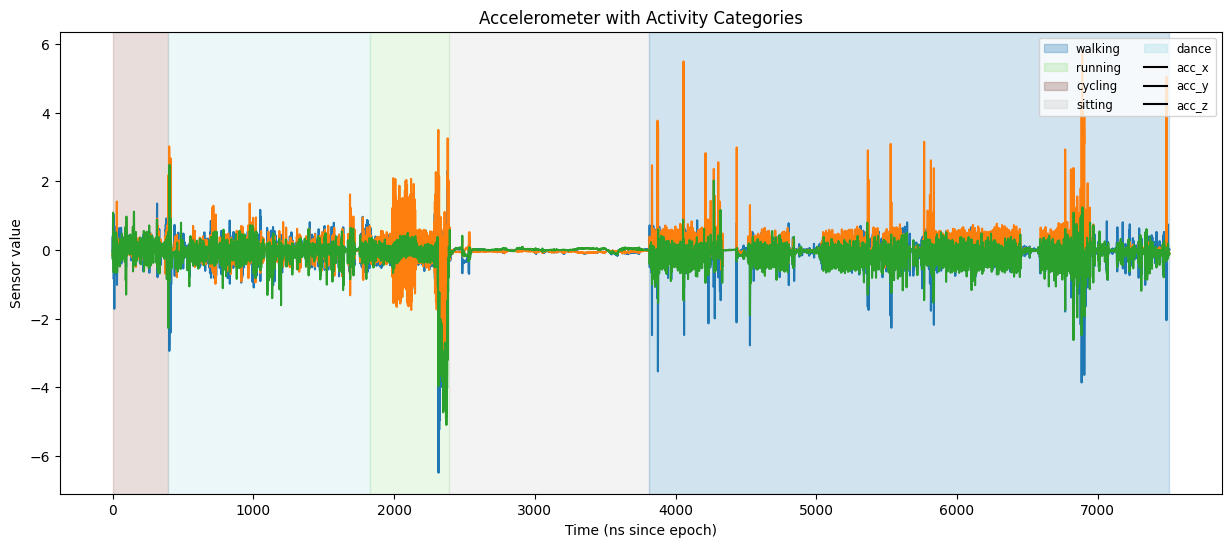

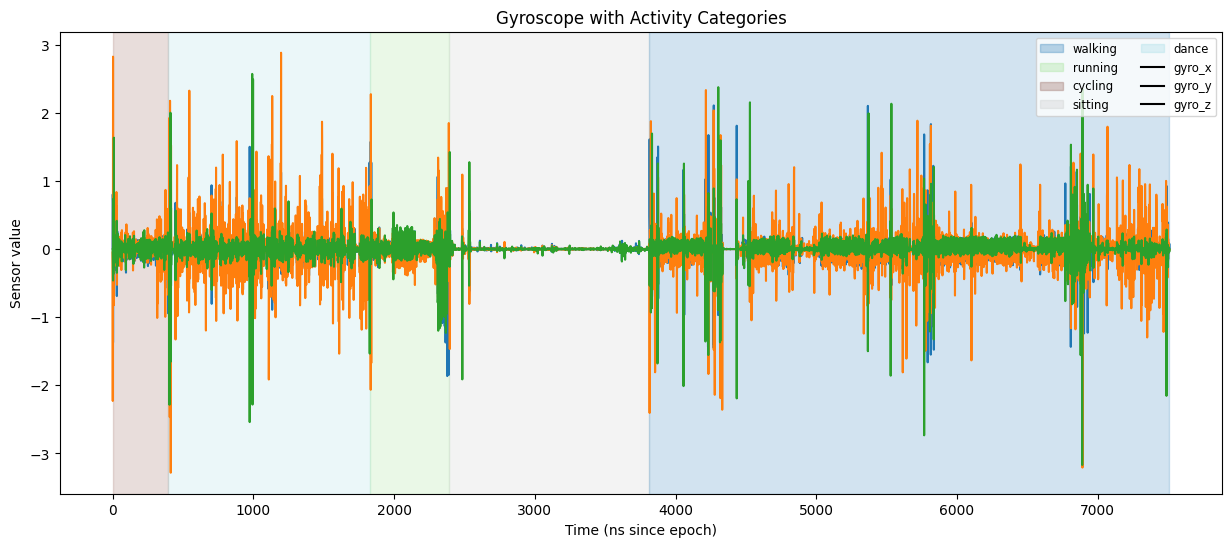

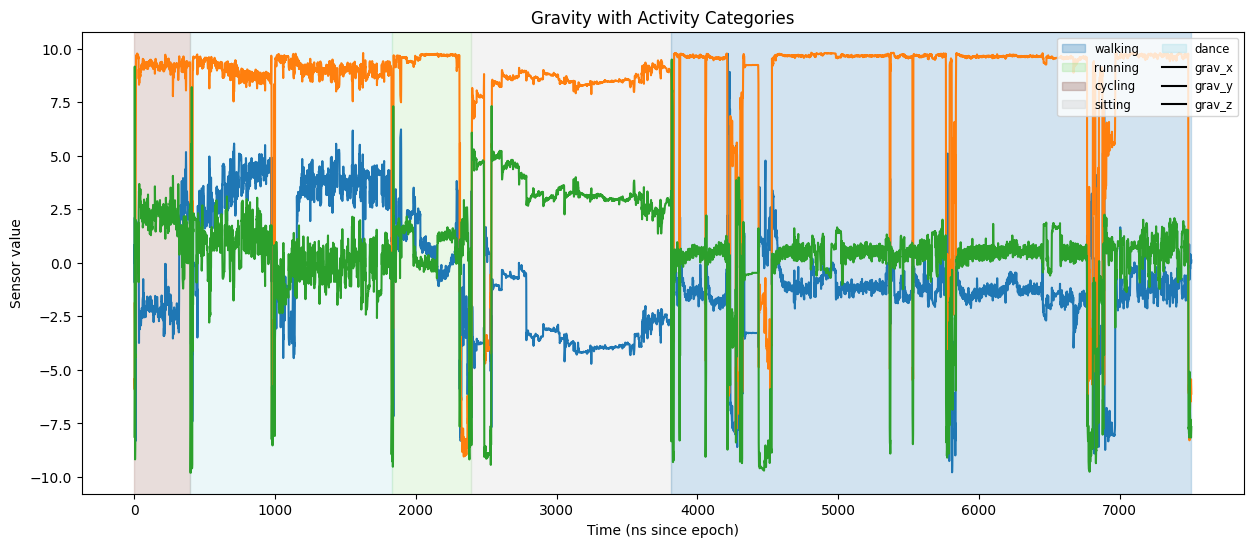

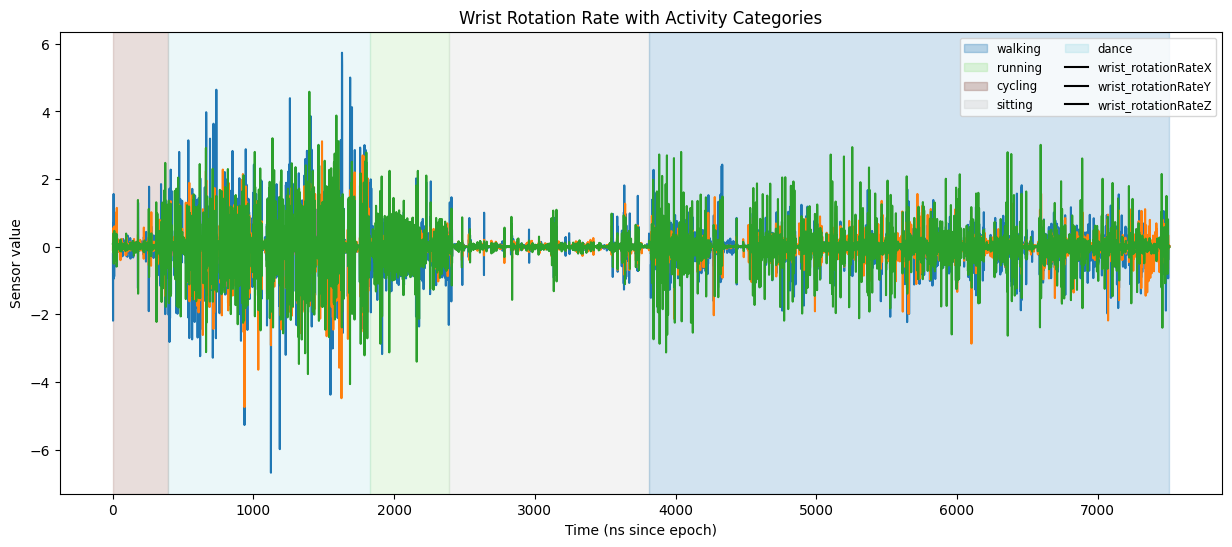

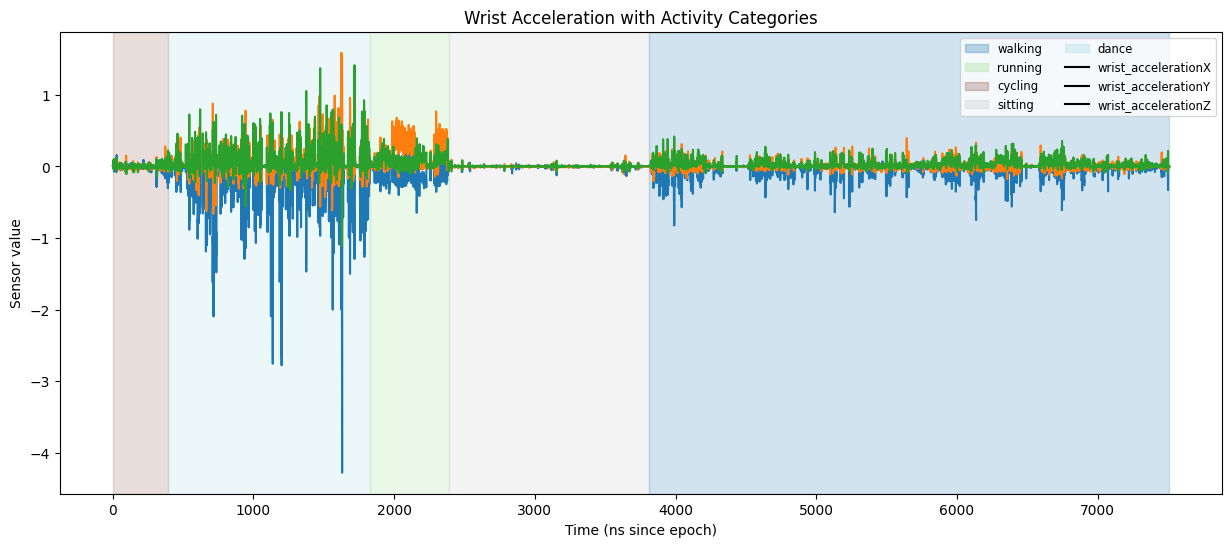

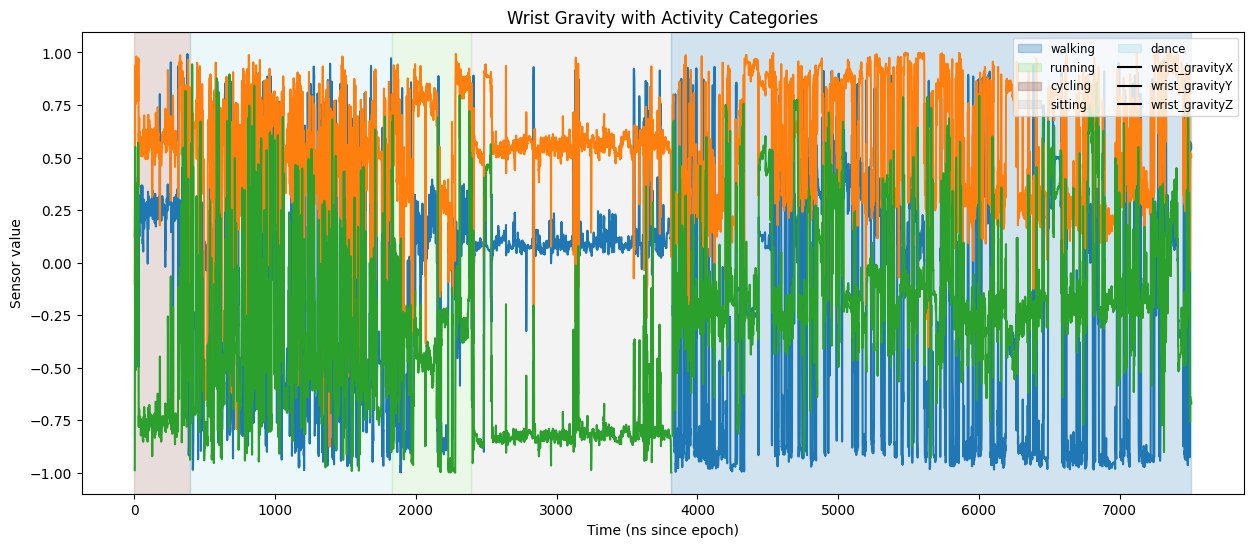

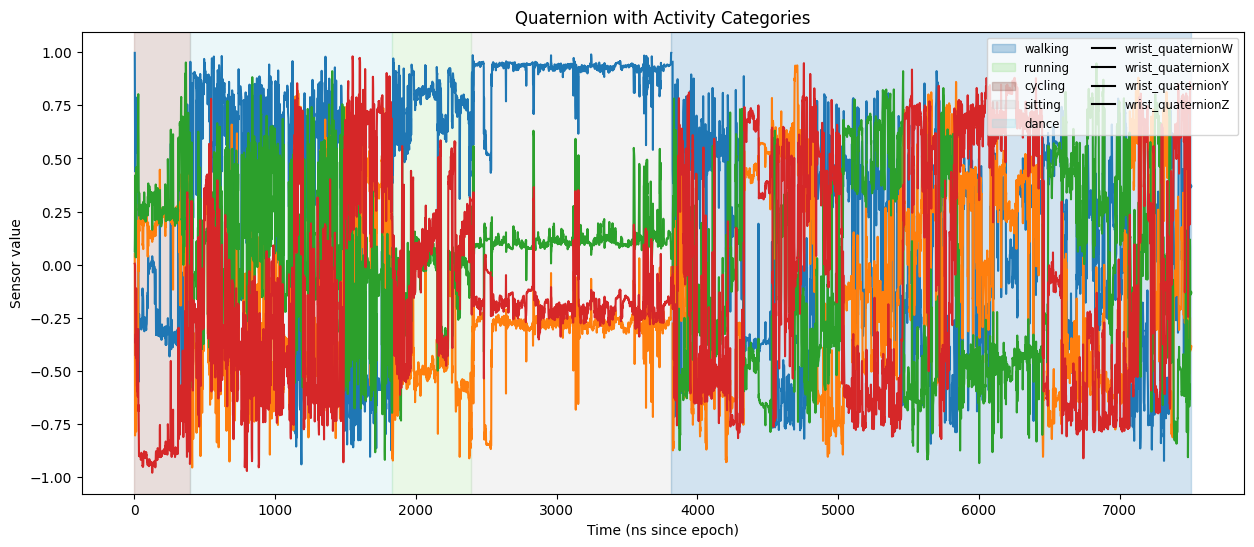

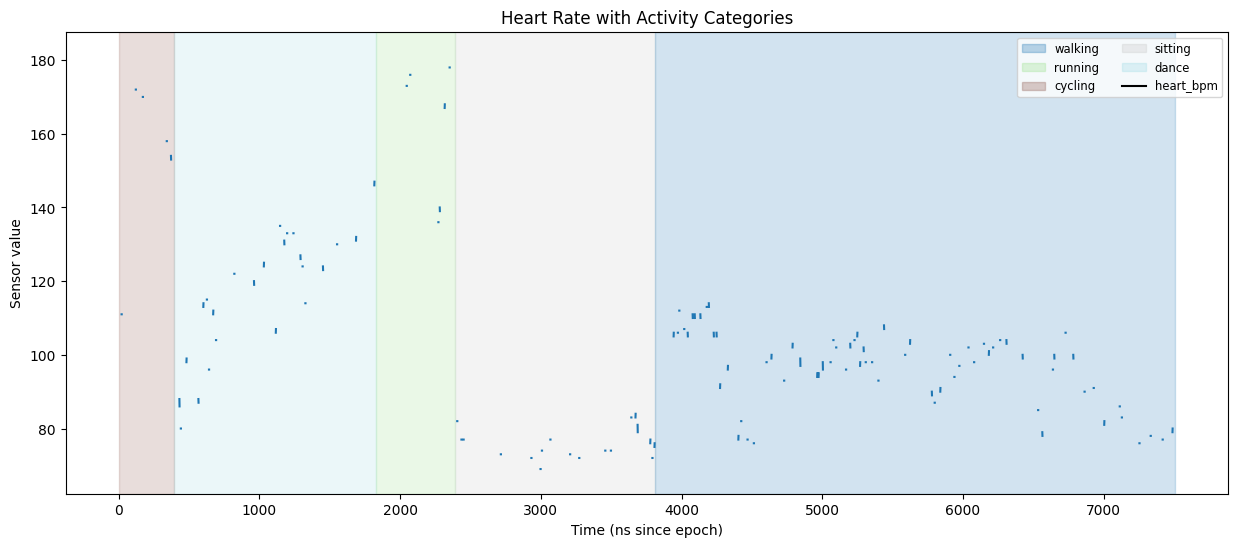

In [571]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure index is datetime
df.index = pd.to_datetime(df.index)
sensor_groups = {
    'Accelerometer': ['acc_x', 'acc_y', 'acc_z'],
    'Gyroscope': ['gyro_x', 'gyro_y', 'gyro_z'],
    'Gravity': ['grav_x', 'grav_y', 'grav_z'],
    'Wrist Rotation Rate': ['wrist_rotationRateX', 'wrist_rotationRateY', 'wrist_rotationRateZ'],
    'Wrist Acceleration': ['wrist_accelerationX', 'wrist_accelerationY', 'wrist_accelerationZ'],
    'Wrist Gravity': ['wrist_gravityX', 'wrist_gravityY', 'wrist_gravityZ'],
    'Quaternion': ['wrist_quaternionW', 'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ'],
    'Barometer': ['baro_relativeAltitude', 'baro_pressure'],  # might not exist in your df, that's okay
    'Heart Rate': ['heart_bpm']
}

category_col = 'activity'  # Your actual activity column

time_ns = df.index.view('int64')

# Find intervals where activity changes to shade background
intervals = []
prev_cat = None
start_idx = None

for idx, cat in enumerate(df[category_col]):
    if cat != prev_cat:
        if prev_cat is not None:
            intervals.append((start_idx, idx-1, prev_cat))
        start_idx = idx
        prev_cat = cat
intervals.append((start_idx, len(df)-1, prev_cat))  # add last interval

for group_name, columns in sensor_groups.items():
    valid_columns = [col for col in columns if col in df.columns]
    if not valid_columns:
        continue

    fig, ax = plt.subplots(figsize=(15, 6))

    for col in valid_columns:
        ax.plot(time_ns, df[col], label=col)

    # Shade background by activity intervals
    ymin, ymax = ax.get_ylim()
    unique_activities = list(set(df[category_col]))
    colors = plt.cm.get_cmap('tab20', len(unique_activities))

    activity_to_color = {act: colors(i) for i, act in enumerate(unique_activities)}

    for start, end, cat in intervals:
        ax.axvspan(time_ns[start], time_ns[end], color=activity_to_color[cat], alpha=0.2)

    ax.set_title(f"{group_name} with Activity Categories")
    ax.set_xlabel('Time (ns since epoch)')
    ax.set_ylabel('Sensor value')

    # Build custom legend for activities
    from matplotlib.patches import Patch
    legend_handles = [Patch(color=activity_to_color[act], alpha=0.3, label=act) for act in unique_activities]
    ax.legend(handles=legend_handles + [plt.Line2D([0], [0], color='black', label=col) for col in valid_columns],
              loc='upper right', fontsize='small', ncol=2)



    plt.show()


/var/folders/zk/93g1cp6546gfbhh4wkf04p4c0000gn/T/ipykernel_48435/4027881996.py:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/goran/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


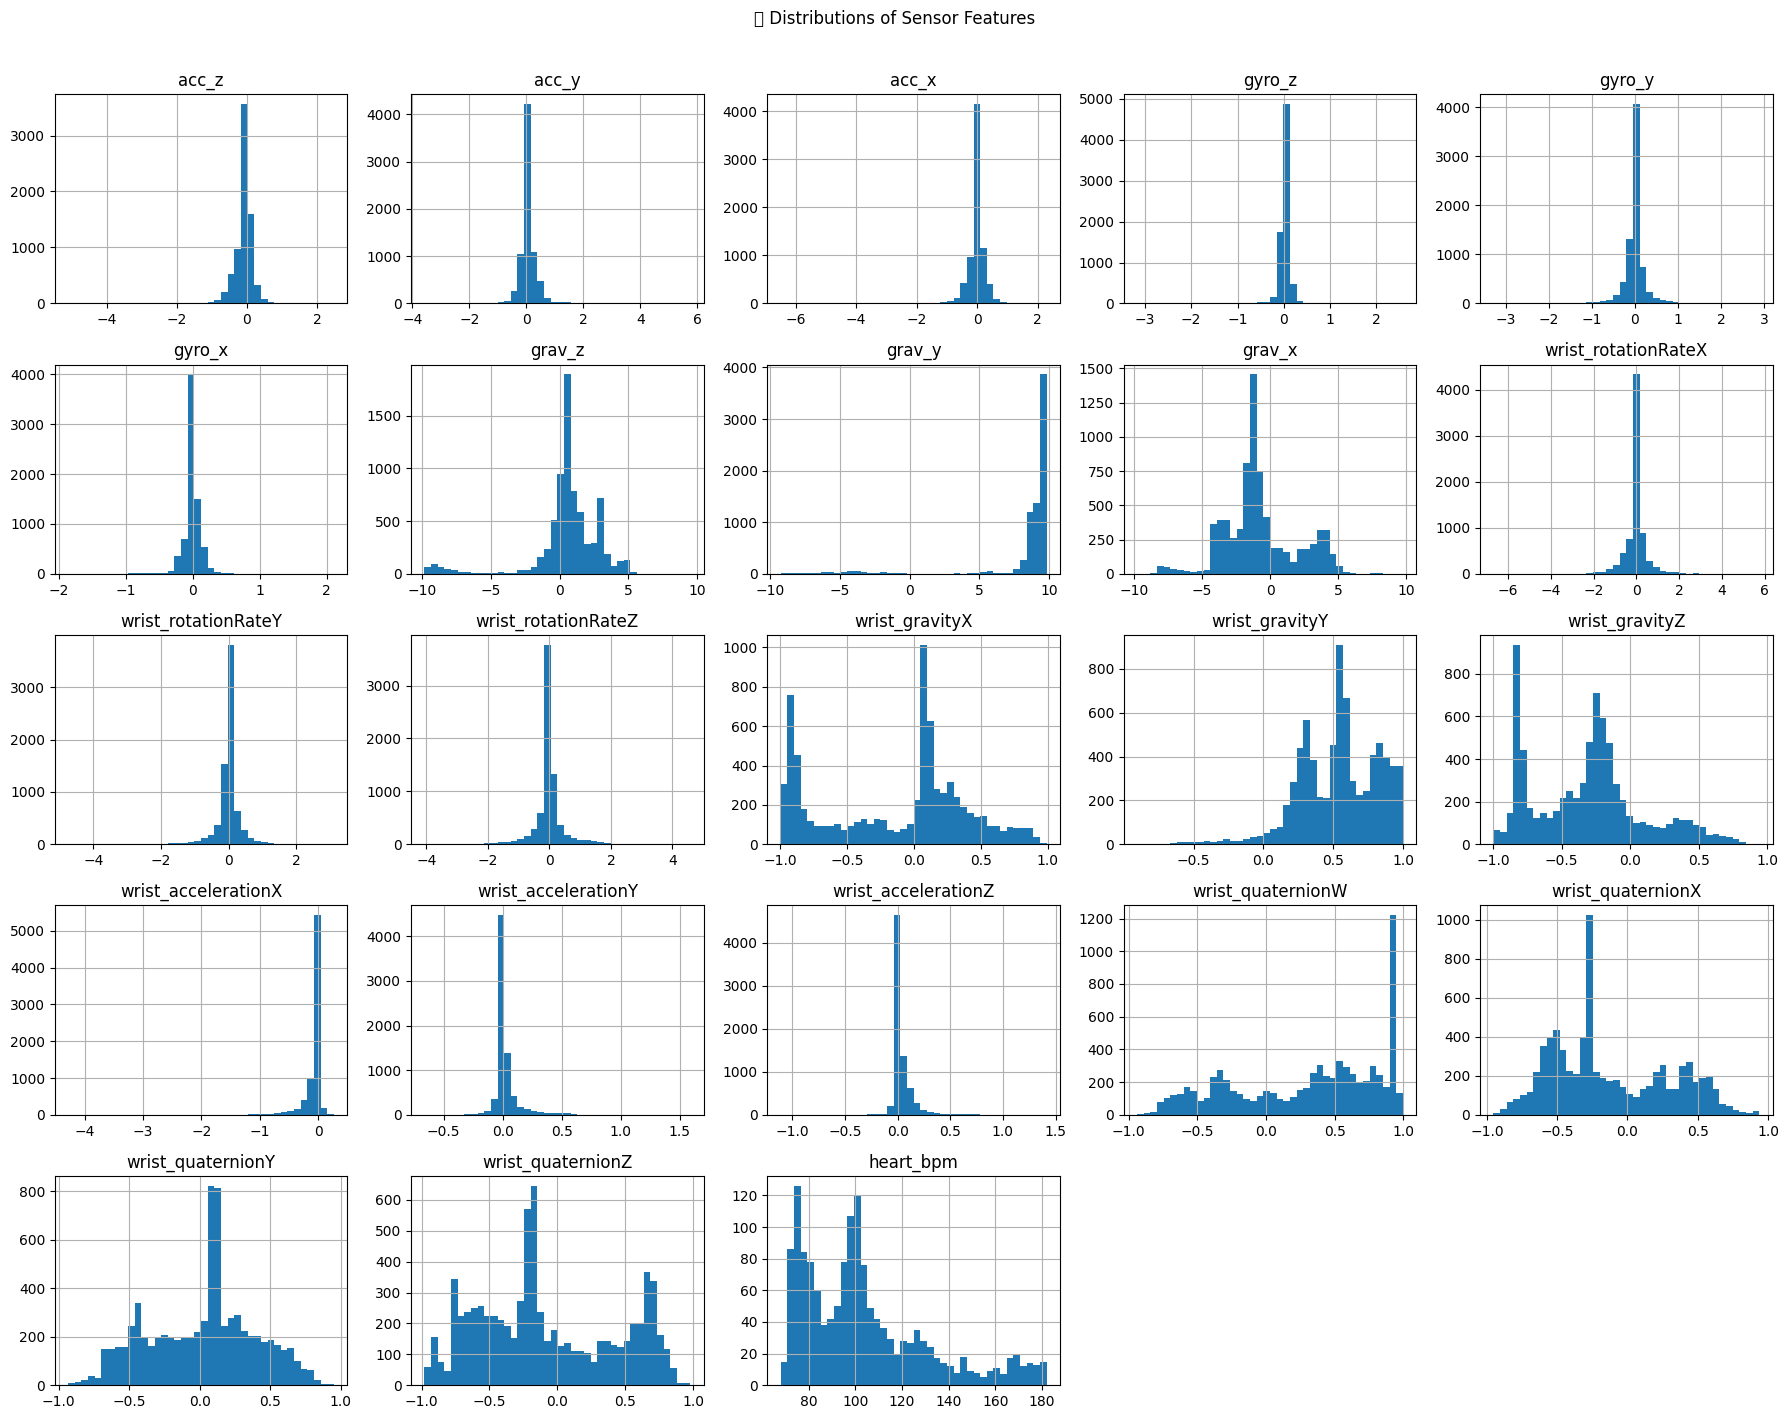

In [633]:
# Distribution of features
df.hist(figsize=(18, 14), bins=40)
plt.suptitle('📊 Distributions of Sensor Features', y=1.01)
plt.tight_layout()
plt.show()

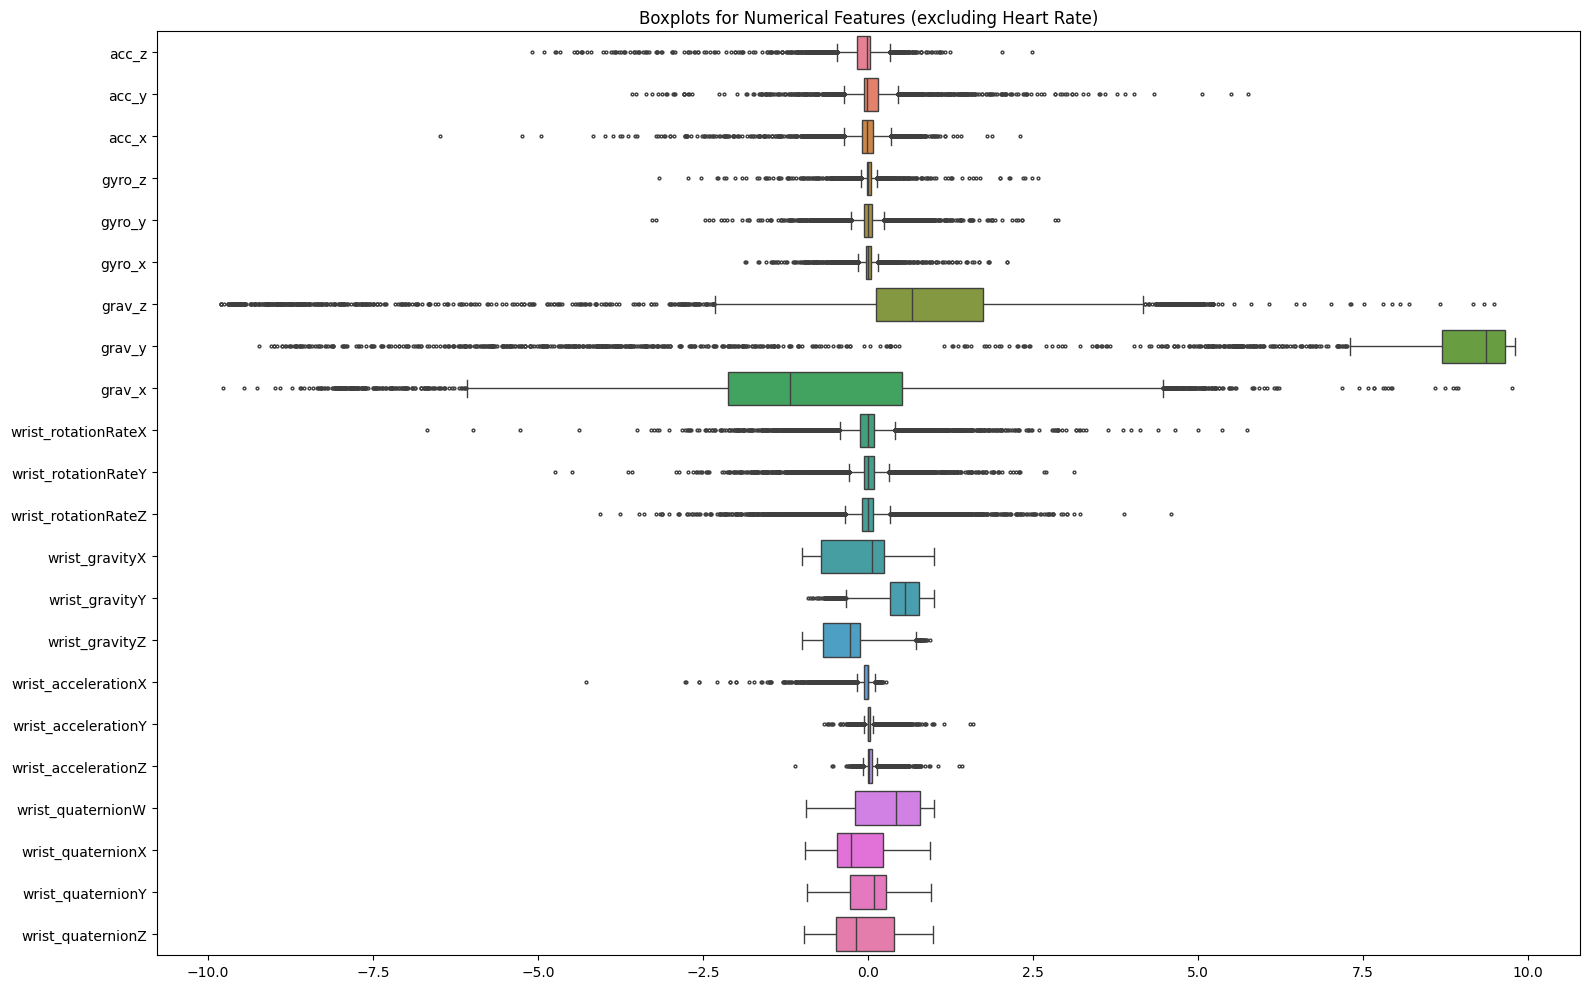

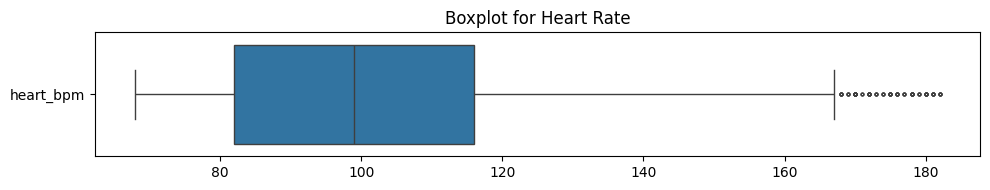

In [573]:
# Separate numerical columns
numerical_cols = df.select_dtypes(include='number').columns
heart_col = 'heart_bpm'

# Main numerical features (excluding heart rate)
main_features = [col for col in numerical_cols if col != heart_col]

# Plot 1: All numerical features except heart rate
plt.figure(figsize=(16, 10))
sns.boxplot(data=df[main_features], orient='h', fliersize=2)
plt.title("Boxplots for Numerical Features (excluding Heart Rate)")
plt.tight_layout()
plt.show()

# Plot 2: Heart rate separately
plt.figure(figsize=(10, 2))
sns.boxplot(data=df[[heart_col]], orient='h', fliersize=2)
plt.title("Boxplot for Heart Rate")
plt.tight_layout()
plt.show()


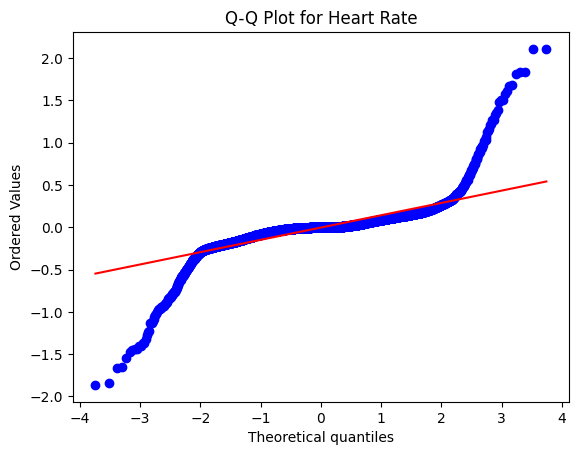

In [574]:
import scipy.stats as stats

stats.probplot(df['gyro_x'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot for Heart Rate")
plt.show()



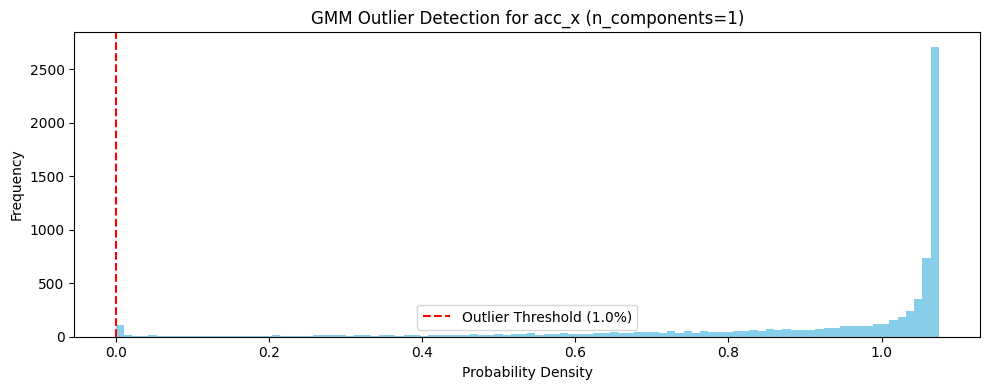

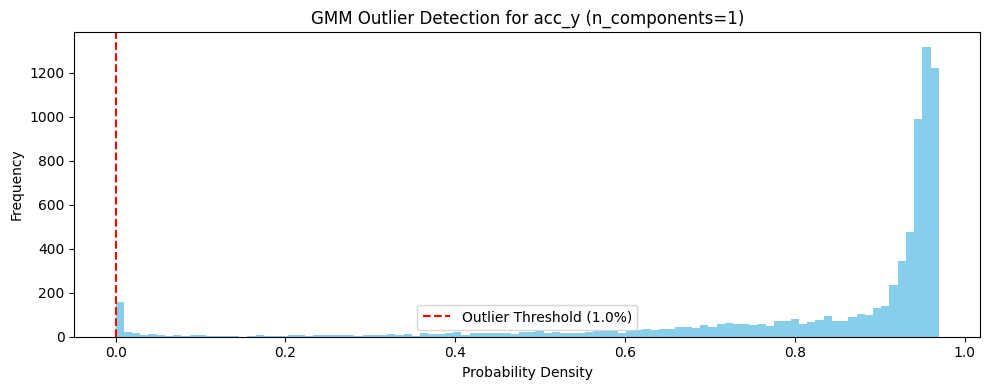

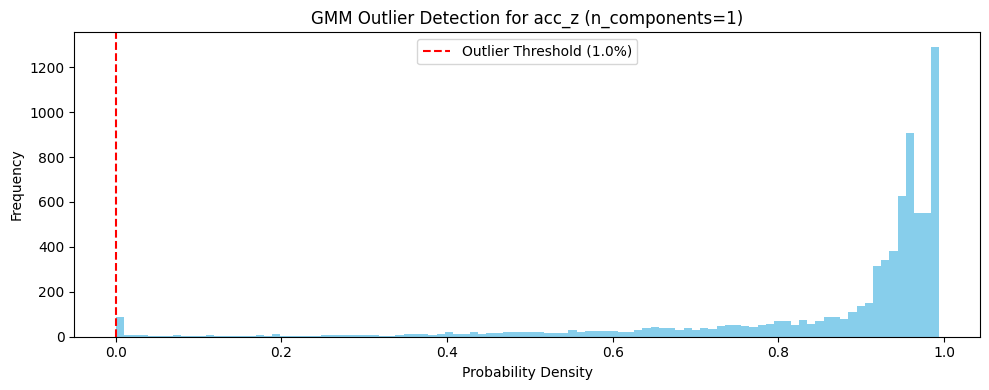

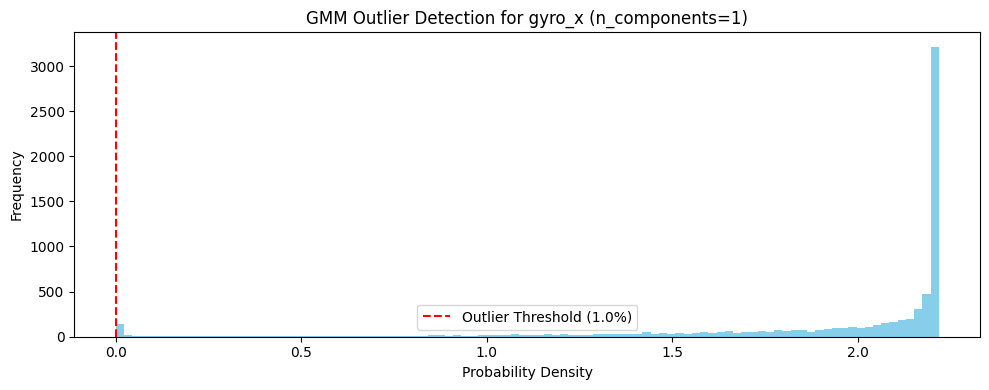

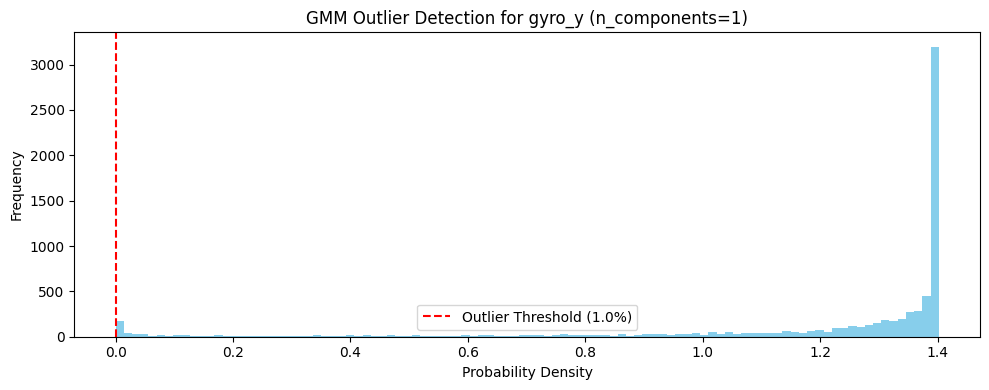

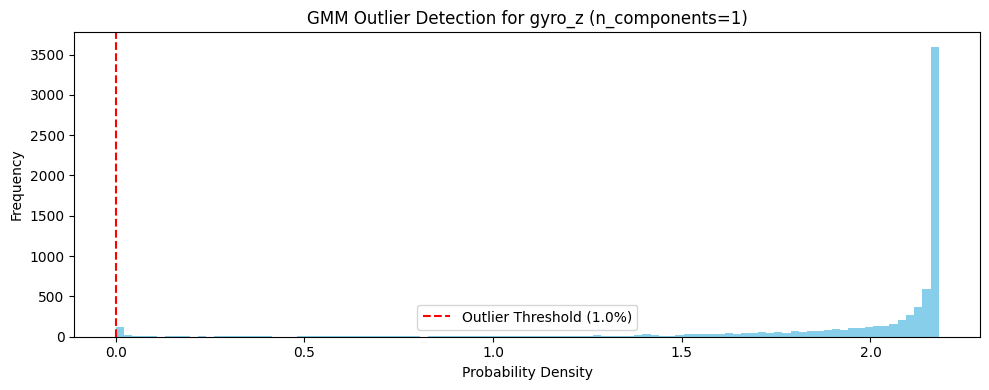

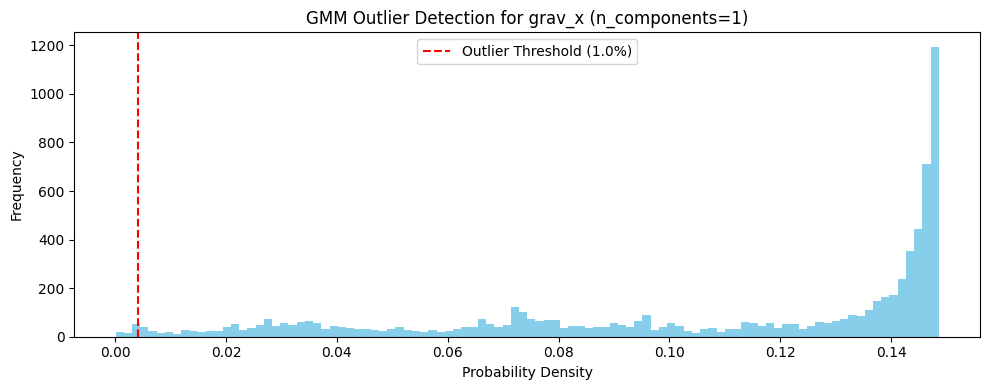

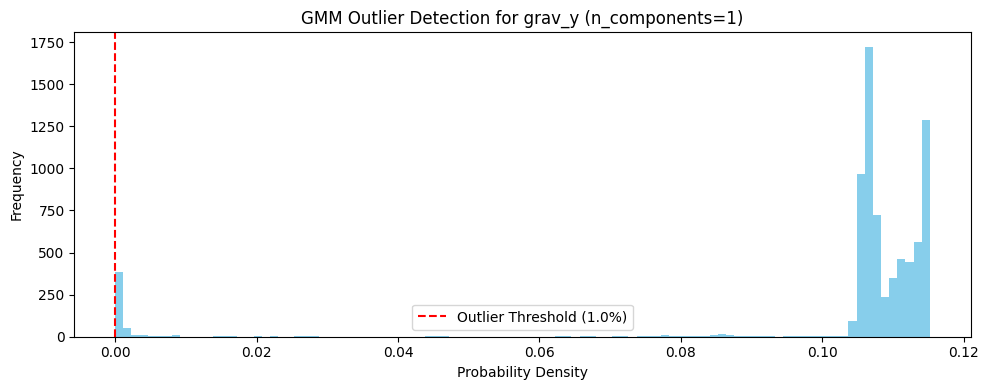

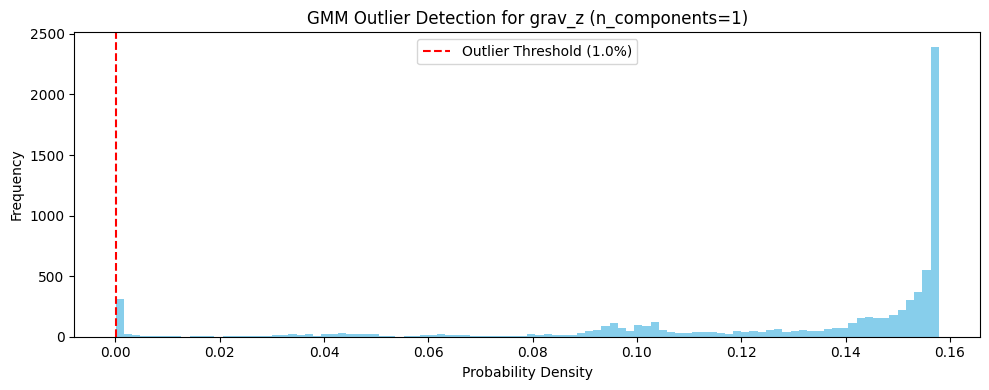

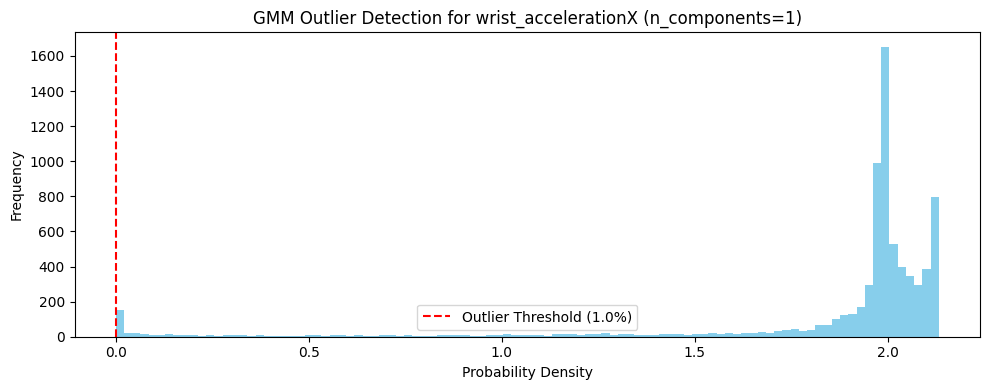

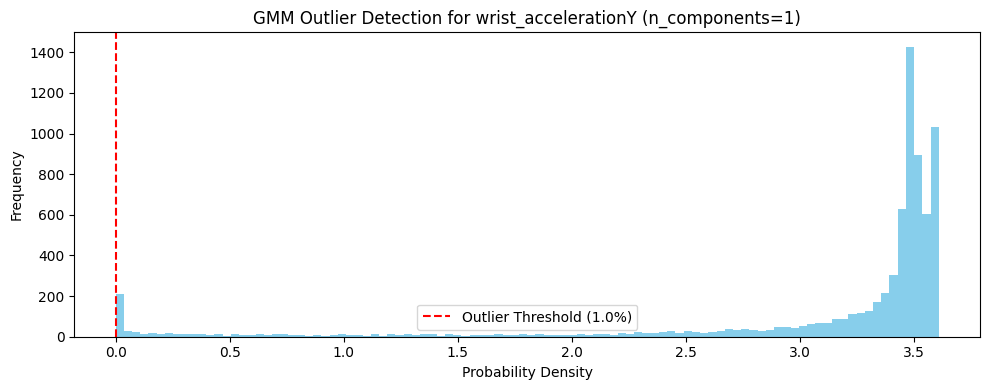

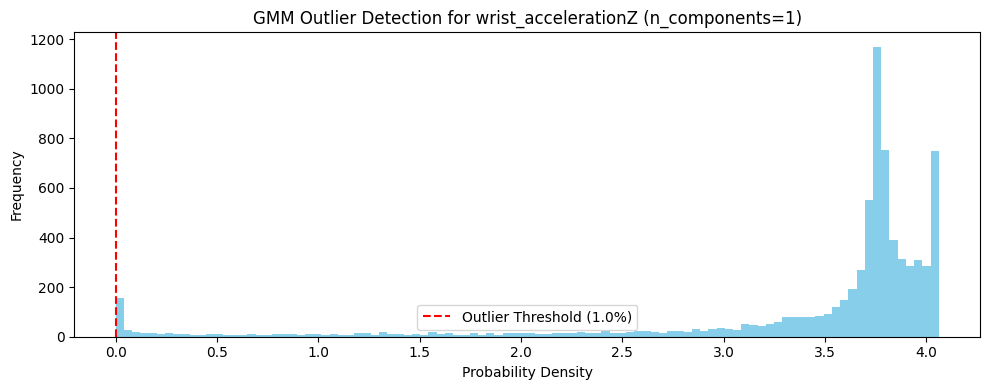

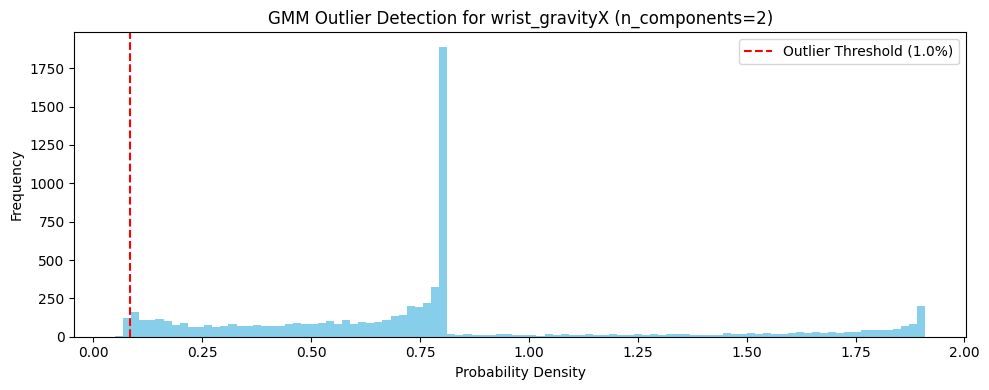

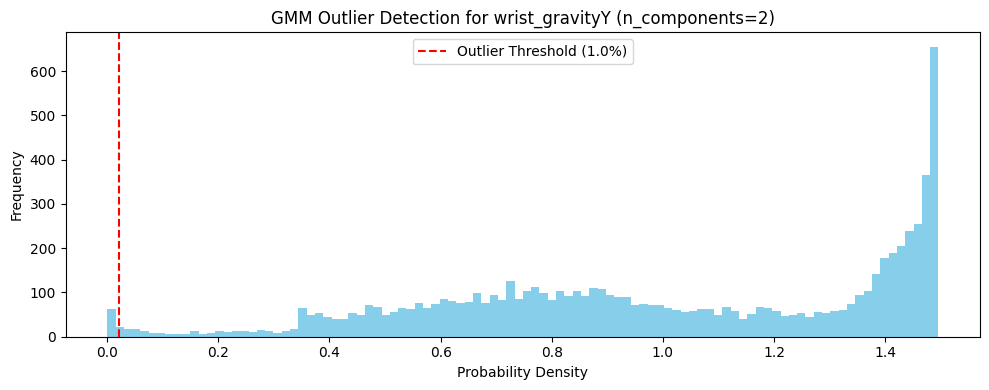

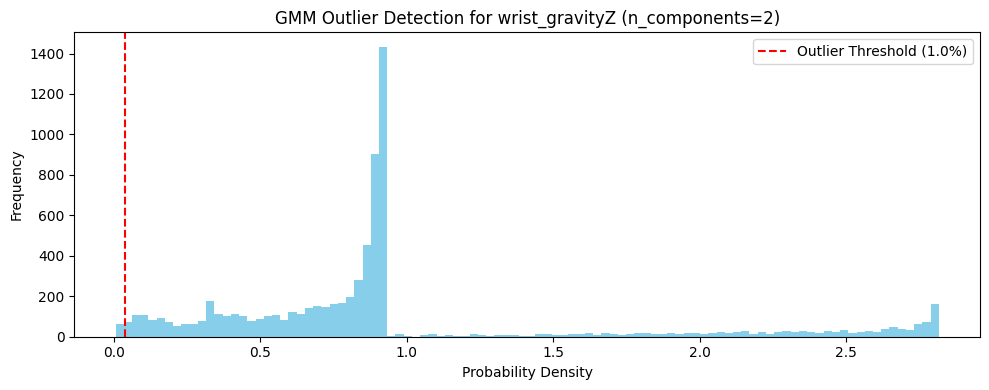

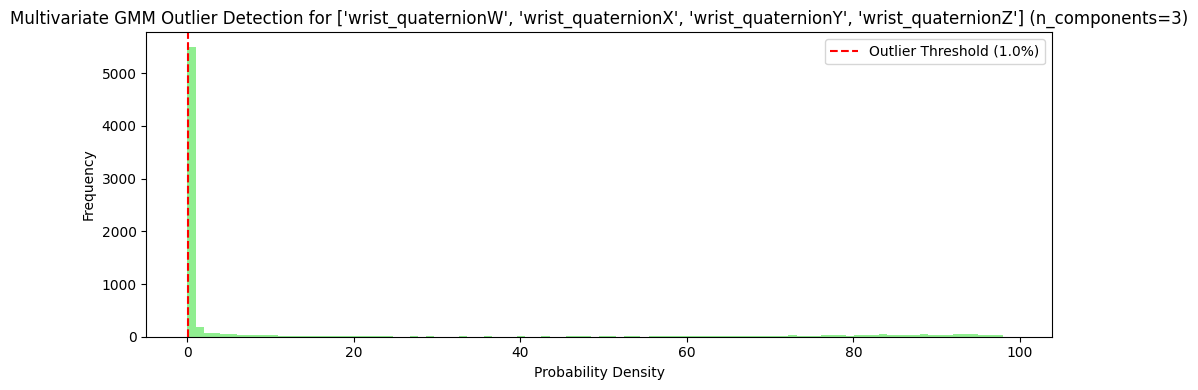

In [151]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def apply_gmm_outlier_detection(df, col, n_components=1, quantile_threshold=0.01, plot=True):
    data = df[df[col].notnull()][col]
    reshaped_data = data.values.reshape(-1, 1)

    gmm = GaussianMixture(n_components=n_components, max_iter=200, n_init=5, random_state=42)
    gmm.fit(reshaped_data)

    probs = gmm.score_samples(reshaped_data)
    linear_probs = np.exp(probs)  # use exp instead of 10** for better numerical stability

    threshold = np.quantile(linear_probs, quantile_threshold)
    outlier_mask = linear_probs < threshold

    df[col + '_mixture_outlier'] = False
    df.loc[data.index[outlier_mask], col + '_mixture_outlier'] = True
    df[col + '_mixture_score'] = np.nan
    df.loc[data.index, col + '_mixture_score'] = linear_probs

    if plot:
        plt.figure(figsize=(10, 4))
        plt.hist(linear_probs, bins=100, color='skyblue')
        plt.axvline(threshold, color='red', linestyle='--', label=f'Outlier Threshold ({quantile_threshold*100:.1f}%)')
        plt.title(f'GMM Outlier Detection for {col} (n_components={n_components})')
        plt.xlabel('Probability Density')
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()

    return df

def apply_multivariate_gmm(df, cols, n_components=3, quantile_threshold=0.01, plot=True):
    # Drop NaNs in all columns
    data = df[cols].dropna()
    reshaped_data = data.values

    gmm = GaussianMixture(n_components=n_components, max_iter=200, n_init=5, random_state=42)
    gmm.fit(reshaped_data)

    probs = gmm.score_samples(reshaped_data)
    linear_probs = np.exp(probs)

    threshold = np.quantile(linear_probs, quantile_threshold)
    outlier_mask = linear_probs < threshold

    outlier_col_name = '_'.join(cols) + '_mixture_outlier'
    score_col_name = '_'.join(cols) + '_mixture_score'

    df[outlier_col_name] = False
    df.loc[data.index[outlier_mask], outlier_col_name] = True
    df[score_col_name] = np.nan
    df.loc[data.index, score_col_name] = linear_probs

    if plot:
        plt.figure(figsize=(10, 4))
        plt.hist(linear_probs, bins=100, color='lightgreen')
        plt.axvline(threshold, color='red', linestyle='--', label=f'Outlier Threshold ({quantile_threshold*100:.1f}%)')
        plt.title(f'Multivariate GMM Outlier Detection for {cols} (n_components={n_components})')
        plt.xlabel('Probability Density')
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()

    return df


# Define sensors by your inspection
sensor_components = {
    # single peak => 1 component
    'single_peak': [
        'acc_x', 'acc_y', 'acc_z',
        'gyro_x', 'gyro_y', 'gyro_z',
        'grav_x', 'grav_y', 'grav_z',
        'wrist_accelerationX', 'wrist_accelerationY', 'wrist_accelerationZ'
    ],
    # wrist gravity with 2 peaks
    'wrist_gravity': [
        'wrist_gravityX', 'wrist_gravityY', 'wrist_gravityZ'
    ],
    # wrist quaternion (4D, multivariate)
    'wrist_quaternion': [
        'wrist_quaternionW', 'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ'
    ]
}

# Apply univariate GMM for single peak sensors (1 component)
for col in sensor_components['single_peak']:
    if col in df.columns:
        df = apply_gmm_outlier_detection(df, col, n_components=1, quantile_threshold=0.01, plot=True)

# Apply univariate GMM for wrist gravity (2 components)
for col in sensor_components['wrist_gravity']:
    if col in df.columns:
        df = apply_gmm_outlier_detection(df, col, n_components=2, quantile_threshold=0.01, plot=True)

# Apply multivariate GMM for wrist quaternion (3 components by default)
if all(c in df.columns for c in sensor_components['wrist_quaternion']):
    df = apply_multivariate_gmm(df, sensor_components['wrist_quaternion'], n_components=3, quantile_threshold=0.01, plot=True)



In [170]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
features = ['acc_x', 'acc_y', 'acc_z']  # or any other columns you want to check
X = df[features].values  # as numpy array
# Initialize LOF model; n_neighbors is the 'k' in your explanation (default 20)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # contamination is expected fraction of outliers

# Fit the model and predict outliers (-1 = outlier, 1 = inlier)
outlier_labels = lof.fit_predict(X)

# Get LOF scores (negative_outlier_factor_)
lof_scores = -lof.negative_outlier_factor_

# Add results to your DataFrame
df['LOF_outlier'] = outlier_labels == -1
df['LOF_score'] = lof_scores



In [171]:
print(df[['LOF_outlier', 'LOF_score']].head(10))
print(f"Number of LOF outliers detected: {df['LOF_outlier'].sum()}")


                               LOF_outlier  LOF_score
1970-01-01 00:00:00.000000000        False      1.358
1970-01-01 00:00:00.000000001        False      1.012
1970-01-01 00:00:00.000000002        False      1.121
1970-01-01 00:00:00.000000003         True      1.921
1970-01-01 00:00:00.000000004        False      1.057
1970-01-01 00:00:00.000000005        False      1.119
1970-01-01 00:00:00.000000006        False      1.094
1970-01-01 00:00:00.000000007         True      1.732
1970-01-01 00:00:00.000000008         True      1.607
1970-01-01 00:00:00.000000009        False      1.158
Number of LOF outliers detected: 376


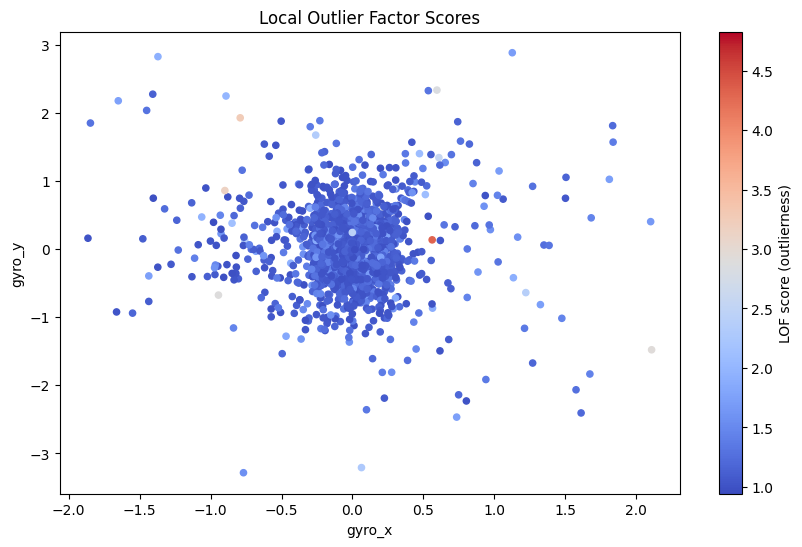

In [172]:
# acc_x vs acc_y (horizontal movement)
# acc_z vs grav_z (vertical motion vs. gravity)
# gyr_x vs gyr_y (rotational movement)

plt.figure(figsize=(10,6))
plt.scatter(df['gyro_x'], df['gyro_y'], c=df['LOF_score'], cmap='coolwarm', s=20)
plt.colorbar(label='LOF score (outlierness)')
plt.title('Local Outlier Factor Scores')
plt.xlabel('gyro_x')
plt.ylabel('gyro_y')
plt.show()


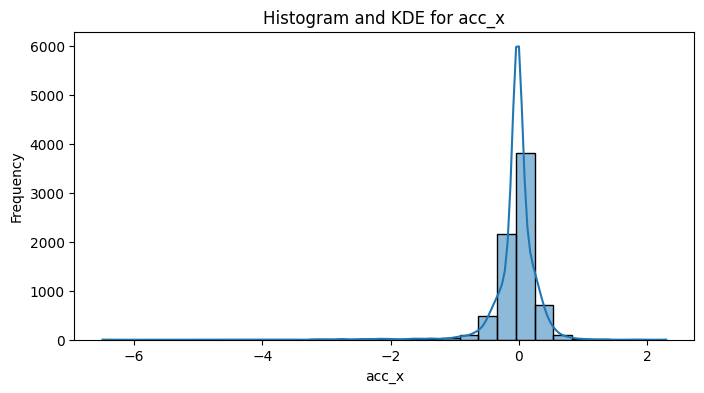

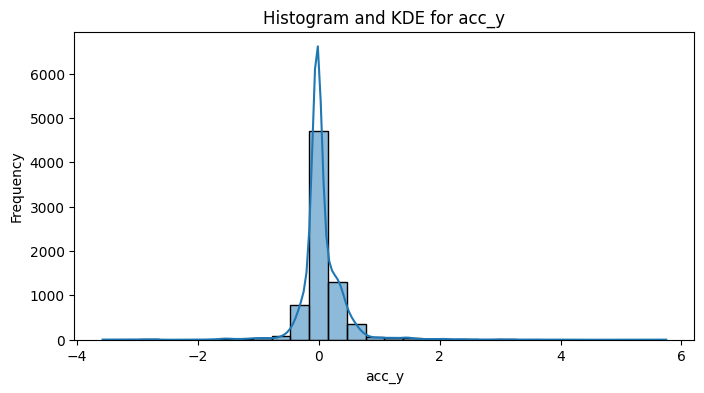

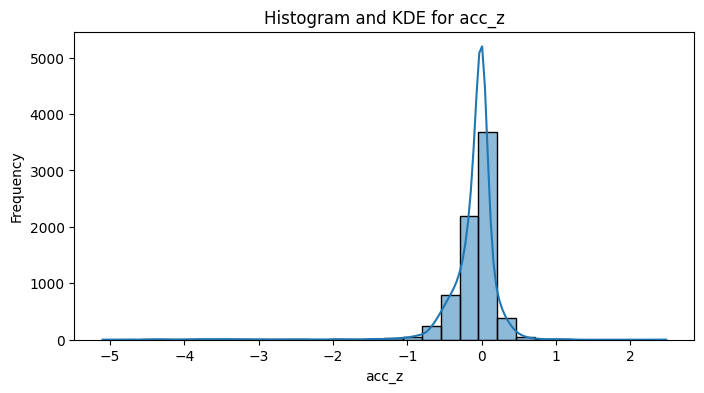

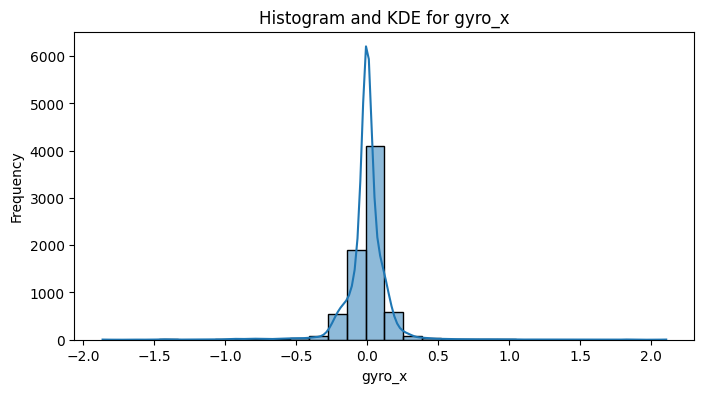

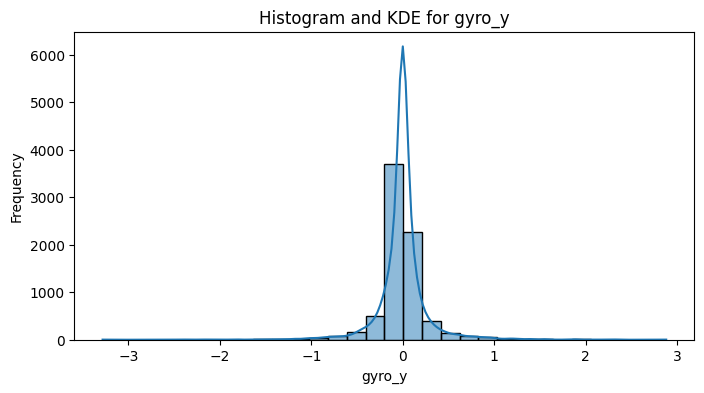

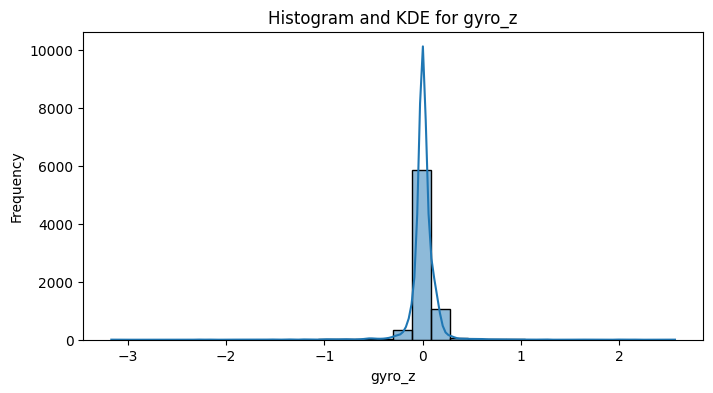

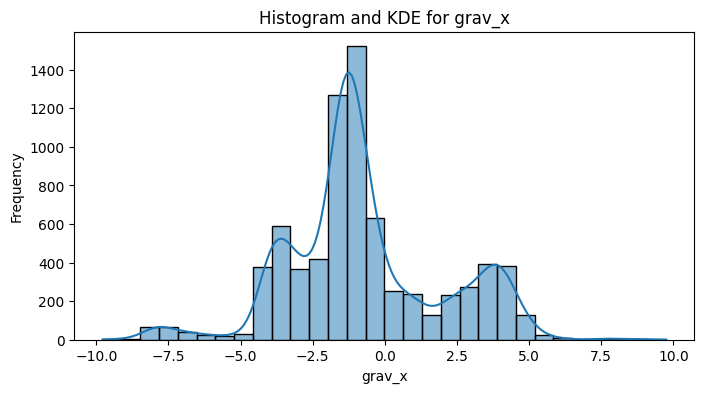

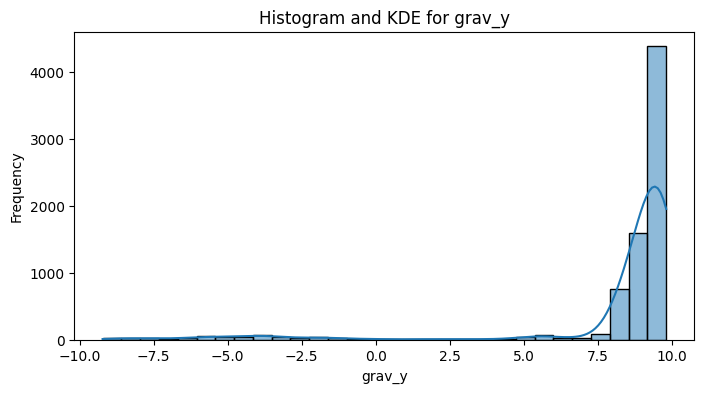

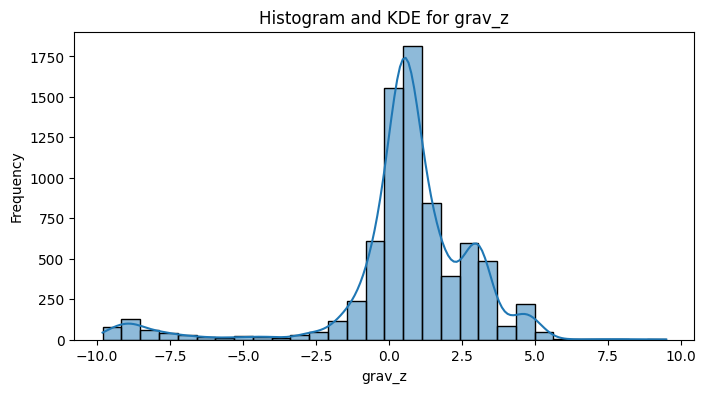

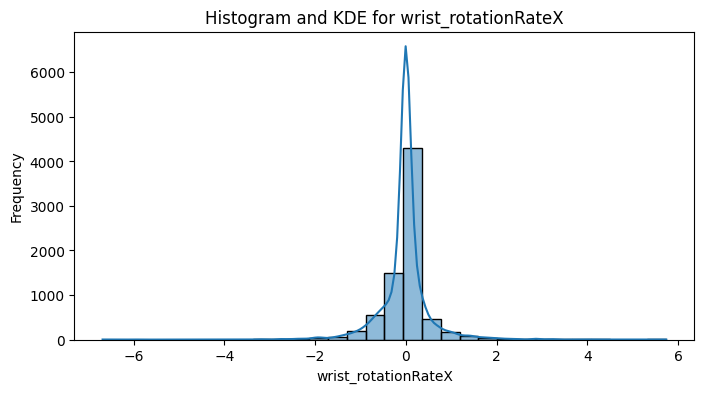

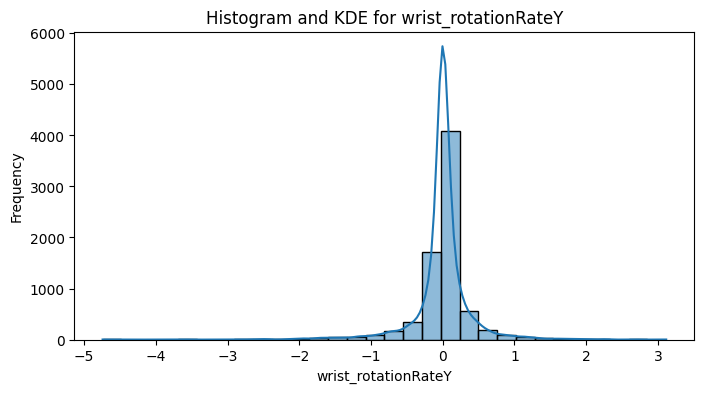

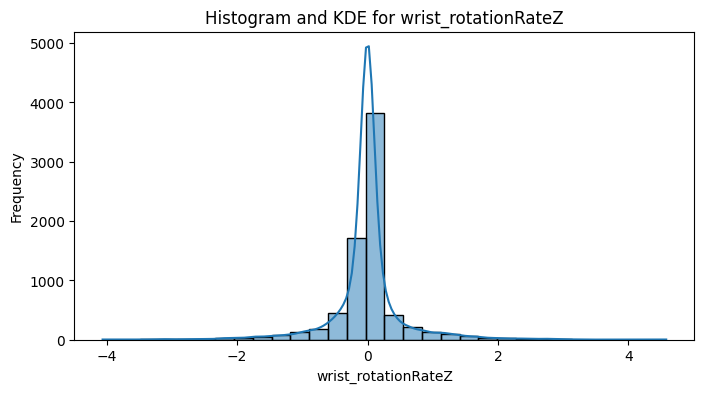

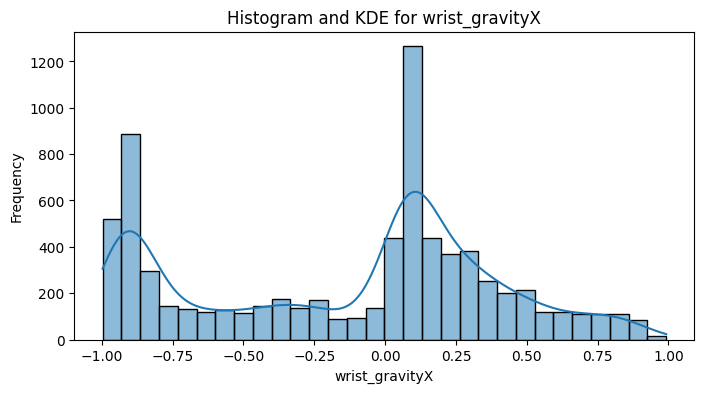

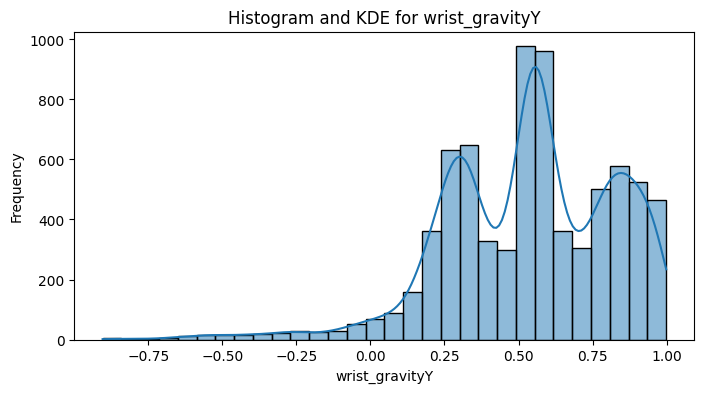

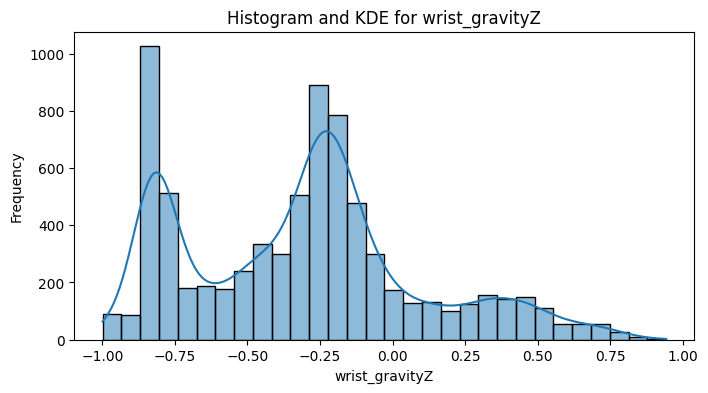

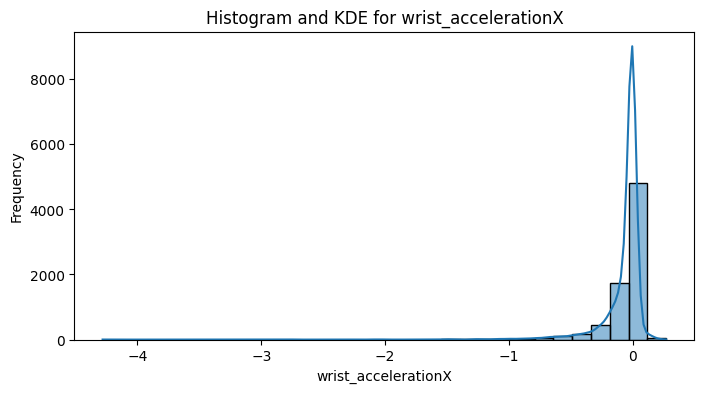

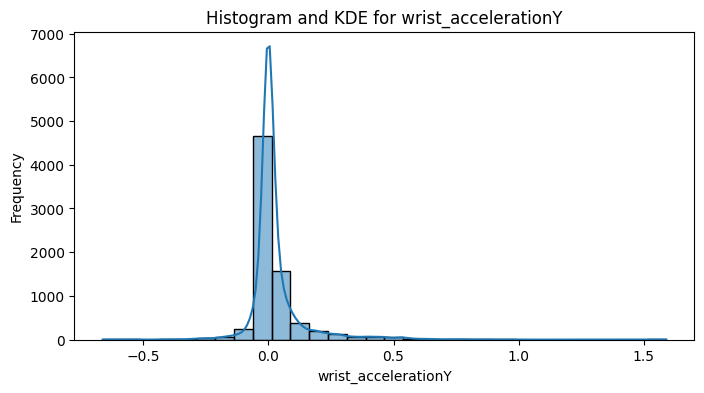

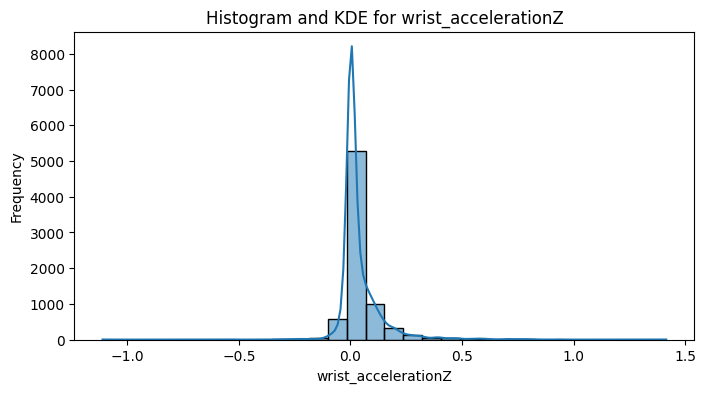

                 Column  Skewness  Kurtosis  Shapiro-W p-value
0                 acc_x    -4.591    45.419              0.000
1                 acc_y     1.820    33.816              0.000
2                 acc_z    -5.707    50.965              0.000
3                gyro_x     0.172    33.501              0.000
4                gyro_y     0.115    21.035              0.000
5                gyro_z    -1.536    80.785              0.000
6                grav_x     0.267     0.304              0.000
7                grav_y    -3.429    10.771              0.000
8                grav_z    -1.948     5.927              0.000
9   wrist_rotationRateX     0.168    18.152              0.000
10  wrist_rotationRateY    -1.312    16.075              0.000
11  wrist_rotationRateZ     0.027     9.772              0.000
12       wrist_gravityX    -0.208    -1.134              0.000
13       wrist_gravityY    -0.748     1.277              0.000
14       wrist_gravityZ     0.446    -0.286            

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis, shapiro

# List of sensor columns to check
sensor_columns = [
    'acc_x', 'acc_y', 'acc_z',
    'gyro_x', 'gyro_y', 'gyro_z',
    'grav_x', 'grav_y', 'grav_z',
    'wrist_rotationRateX', 'wrist_rotationRateY', 'wrist_rotationRateZ',
    'wrist_gravityX', 'wrist_gravityY', 'wrist_gravityZ',
    'wrist_accelerationX', 'wrist_accelerationY', 'wrist_accelerationZ'
]

results = []

for col in sensor_columns:
    if col not in df.columns:
        print(f"Warning: {col} not found in DataFrame")
        continue

    data = df[col].dropna()
    
    # Plot histogram + KDE
    plt.figure(figsize=(8,4))
    sns.histplot(data, kde=True, bins=30)
    plt.title(f'Histogram and KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Calculate statistics
    skewness = skew(data)
    kurt = kurtosis(data)  # Fisher’s definition (normal=0)
    
    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(data.sample(min(5000, len(data))))  # limit sample size for speed
    
    results.append({
        'Column': col,
        'Skewness': skewness,
        'Kurtosis': kurt,
        'Shapiro-W p-value': p_value
    })

# Create results DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

# Interpretation hint:
# p-value > 0.05 indicates data could be normal (fail to reject normality)
# Skewness close to 0 indicates symmetry
# Kurtosis close to 0 indicates normal tail behavior


In [180]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Select your sensor columns (replace with your actual sensor columns)
sensor_cols = [
    'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
    'grav_x', 'grav_y', 'grav_z',
    'wrist_rotationRateX', 'wrist_rotationRateY', 'wrist_rotationRateZ',
    'wrist_gravityX', 'wrist_gravityY', 'wrist_gravityZ',
    'wrist_accelerationX', 'wrist_accelerationY', 'wrist_accelerationZ'
]

# Copy your dataframe to not overwrite original
df_transformed = df.copy()

# Initialize the transformer
pt = PowerTransformer(method='yeo-johnson')

# Fit-transform your sensor data
df_transformed[sensor_cols] = pt.fit_transform(df_transformed[sensor_cols])

# Now df_transformed has transformed sensor data closer to normal distribution

# Optional: check skewness again
print(df_transformed[sensor_cols].skew())


acc_x                  0.857
acc_y                 -0.447
acc_z                  1.887
gyro_x                 0.088
gyro_y                -0.129
gyro_z                 0.585
grav_x                -0.250
grav_y                -2.091
grav_z                 0.362
wrist_rotationRateX   -0.088
wrist_rotationRateY    0.277
wrist_rotationRateZ   -0.020
wrist_gravityX         0.029
wrist_gravityY        -0.044
wrist_gravityZ         0.064
wrist_accelerationX    0.351
wrist_accelerationY   -1.188
wrist_accelerationZ   -2.474
dtype: float64


In [182]:
import pandas as pd
from scipy.stats import shapiro, kurtosis, skew
from sklearn.preprocessing import PowerTransformer

# Your sensor columns
sensor_cols = [
    'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
    'grav_x', 'grav_y', 'grav_z',
    'wrist_rotationRateX', 'wrist_rotationRateY', 'wrist_rotationRateZ',
    'wrist_gravityX', 'wrist_gravityY', 'wrist_gravityZ',
    'wrist_accelerationX', 'wrist_accelerationY', 'wrist_accelerationZ'
]

# Copy original df
df_transformed = df.copy()

# Apply Yeo-Johnson transform
pt = PowerTransformer(method='yeo-johnson')
df_transformed[sensor_cols] = pt.fit_transform(df_transformed[sensor_cols])

# Prepare result dataframe
results = []

for col in sensor_cols:
    data = df_transformed[col].dropna()  # drop missing values if any
    shapiro_p = shapiro(data).pvalue
    skewness = skew(data)
    kurt = kurtosis(data)
    results.append({'Column': col, 'Skewness': skewness, 'Kurtosis': kurt, 'Shapiro-W p-value': shapiro_p})

results_df = pd.DataFrame(results)
print(results_df)


                 Column  Skewness  Kurtosis  Shapiro-W p-value
0                 acc_x     0.857    20.684              0.000
1                 acc_y    -0.447    31.419              0.000
2                 acc_z     1.886    57.853              0.000
3                gyro_x     0.088    33.333              0.000
4                gyro_y    -0.129    21.417              0.000
5                gyro_z     0.585    81.495              0.000
6                grav_x    -0.250     0.760              0.000
7                grav_y    -2.090     3.655              0.000
8                grav_z     0.362     2.477              0.000
9   wrist_rotationRateX    -0.088    18.379              0.000
10  wrist_rotationRateY     0.277    13.689              0.000
11  wrist_rotationRateZ    -0.020     9.772              0.000
12       wrist_gravityX     0.029    -0.945              0.000
13       wrist_gravityY    -0.044    -0.538              0.000
14       wrist_gravityZ     0.064    -0.755            

/Users/goran/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7511.
  res = hypotest_fun_out(*samples, **kwds)
/Users/goran/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7500.
  res = hypotest_fun_out(*samples, **kwds)


In [184]:
import numpy as np

def log_transform_non_nan(df, cols):
    df_transformed = df.copy()
    
    for col in cols:
        col_min = df_transformed[col].min()
        shift = 1 - col_min if col_min <= 0 else 0

        # Only apply log1p to non-NaN values
        mask = df_transformed[col].notna()
        df_transformed.loc[mask, col] = np.log1p(df_transformed.loc[mask, col] + shift)
    
    return df_transformed

# Apply to your dataframe
sensor_cols = [
    'acc_x', 'acc_y', 'acc_z',
    'gyro_x', 'gyro_y', 'gyro_z',
    'grav_x', 'grav_y', 'grav_z',
    'wrist_rotationRateX', 'wrist_rotationRateY', 'wrist_rotationRateZ',
    'wrist_gravityX', 'wrist_gravityY', 'wrist_gravityZ',
    'wrist_accelerationX', 'wrist_accelerationY', 'wrist_accelerationZ'
]

df_log_transformed = log_transform_non_nan(df, sensor_cols)


In [185]:
import pandas as pd
from scipy.stats import shapiro, kurtosis, skew
from sklearn.preprocessing import PowerTransformer


# Copy original df
df_transformed = df_log_transformed

# Apply Yeo-Johnson transform
pt = PowerTransformer(method='yeo-johnson')
df_transformed[sensor_cols] = pt.fit_transform(df_transformed[sensor_cols])

# Prepare result dataframe
results = []

for col in sensor_cols:
    data = df_transformed[col].dropna()  # drop missing values if any
    shapiro_p = shapiro(data).pvalue
    skewness = skew(data)
    kurt = kurtosis(data)
    results.append({'Column': col, 'Skewness': skewness, 'Kurtosis': kurt, 'Shapiro-W p-value': shapiro_p})

results_df = pd.DataFrame(results)
print(results_df)


                 Column  Skewness  Kurtosis  Shapiro-W p-value
0                 acc_x     0.855    18.142              0.000
1                 acc_y     0.822    30.158              0.000
2                 acc_z     1.389    39.907              0.000
3                gyro_x     0.858    34.167              0.000
4                gyro_y     0.608    19.446              0.000
5                gyro_z     1.906    80.604              0.000
6                grav_x     0.064     0.446              0.000
7                grav_y    -1.825     2.682              0.000
8                grav_z    -0.045     2.045              0.000
9   wrist_rotationRateX     0.568    16.454              0.000
10  wrist_rotationRateY     0.617    12.626              0.000
11  wrist_rotationRateZ     0.452     9.462              0.000
12       wrist_gravityX    -0.149    -1.110              0.000
13       wrist_gravityY    -0.047    -0.530              0.000
14       wrist_gravityZ    -0.001    -0.764            

/Users/goran/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7511.
  res = hypotest_fun_out(*samples, **kwds)
/Users/goran/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7500.
  res = hypotest_fun_out(*samples, **kwds)


In [178]:
import numpy as np
import scipy.special

def chauvenet(data_table, col, C=5):
    mean = data_table[col].mean()
    std = data_table[col].std()
    N = len(data_table)
    criterion = 1.0 / (C * N)

    deviation = abs(data_table[col] - mean) / std
    prob = 1.0 - scipy.special.erf(deviation / np.sqrt(2))
    mask = prob < criterion
    data_table[col + '_outlier'] = mask
    return data_table

# List your sensor columns here
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
               'grav_x', 'grav_y', 'grav_z', 'wrist_accelerationX', 'wrist_accelerationY', 'wrist_accelerationZ']

# Apply Chauvenet outlier detection to each sensor column
for col in sensor_cols:
    if col in df.columns:
        df = chauvenet(df, col, C=5)

# Combine all individual outlier columns into one global outlier column
outlier_cols = [col + '_outlier' for col in sensor_cols if col + '_outlier' in df.columns]
df['any_outlier'] = df[outlier_cols].any(axis=1)

# Now you can see how many outliers per sensor and overall
print(df[outlier_cols].sum())
print(f"Total rows flagged as outliers in any sensor: {df['any_outlier'].sum()}")


acc_x_outlier                  74
acc_y_outlier                  80
acc_z_outlier                  73
gyro_x_outlier                 99
gyro_y_outlier                 70
gyro_z_outlier                 78
grav_x_outlier                  0
grav_y_outlier                 95
grav_z_outlier                  0
wrist_accelerationX_outlier    71
wrist_accelerationY_outlier    92
wrist_accelerationZ_outlier    82
dtype: int64
Total rows flagged as outliers in any sensor: 451


Each sensor separately


Activity: cycling
  acc_x                | Skew: -0.517 | Kurtosis:  4.882 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


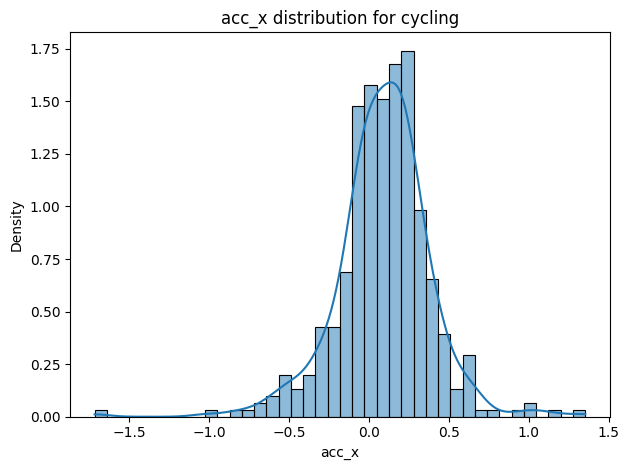

  acc_y                | Skew:  2.776 | Kurtosis: 22.944 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


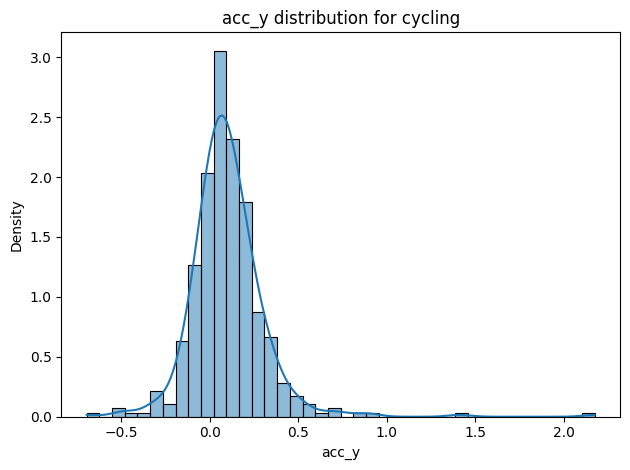

  acc_z                | Skew: -0.933 | Kurtosis:  7.820 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


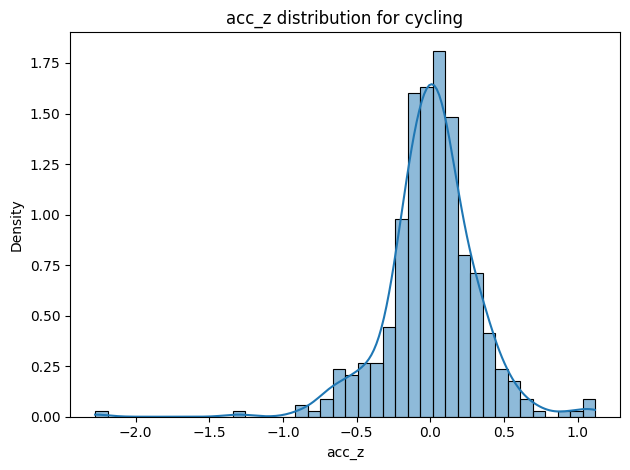


Activity: dance
  acc_x                | Skew: -1.552 | Kurtosis: 13.774 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


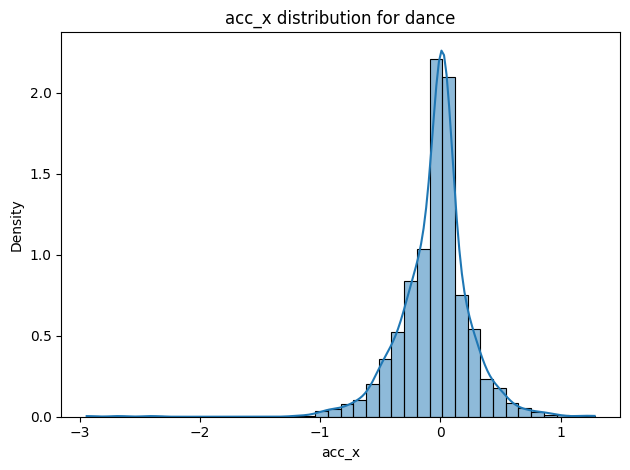

  acc_y                | Skew:  2.105 | Kurtosis: 17.155 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


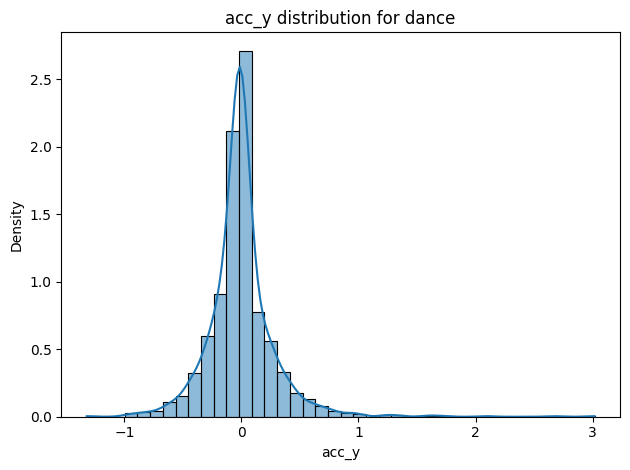

  acc_z                | Skew: -0.034 | Kurtosis: 10.682 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


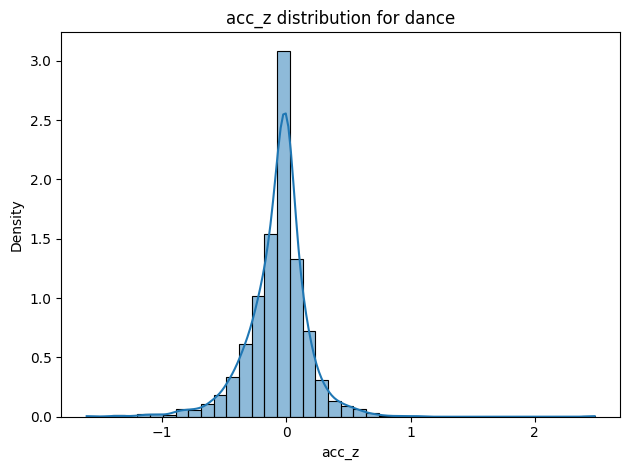


Activity: running
  acc_x                | Skew: -2.903 | Kurtosis: 11.721 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


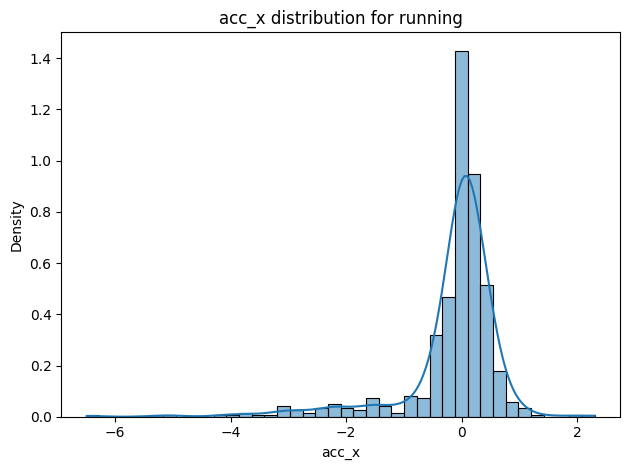

  acc_y                | Skew: -0.546 | Kurtosis:  2.262 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


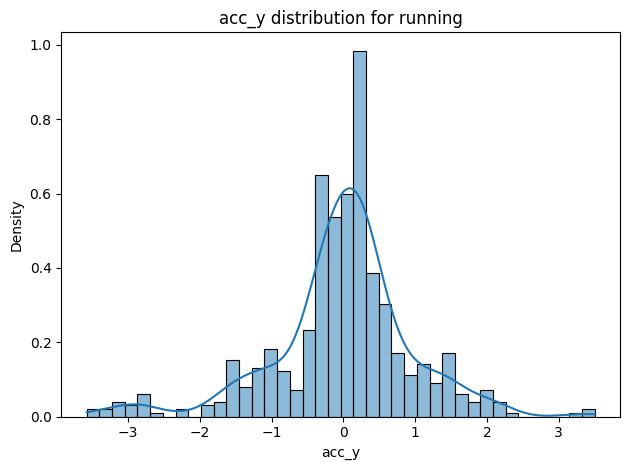

  acc_z                | Skew: -2.461 | Kurtosis:  4.905 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


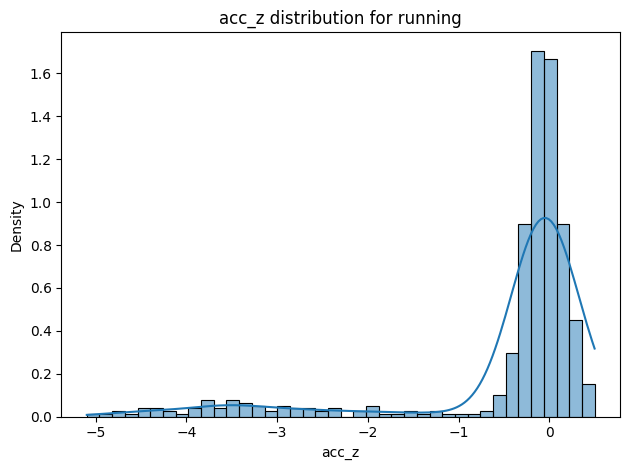


Activity: sitting
  acc_x                | Skew: -2.891 | Kurtosis: 21.340 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


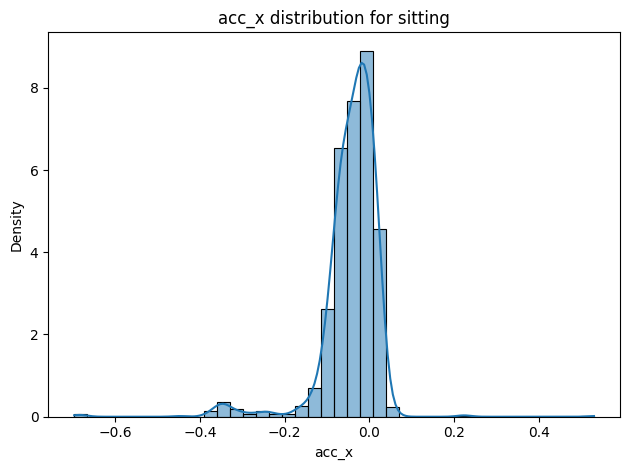

  acc_y                | Skew:  8.117 | Kurtosis: 103.162 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


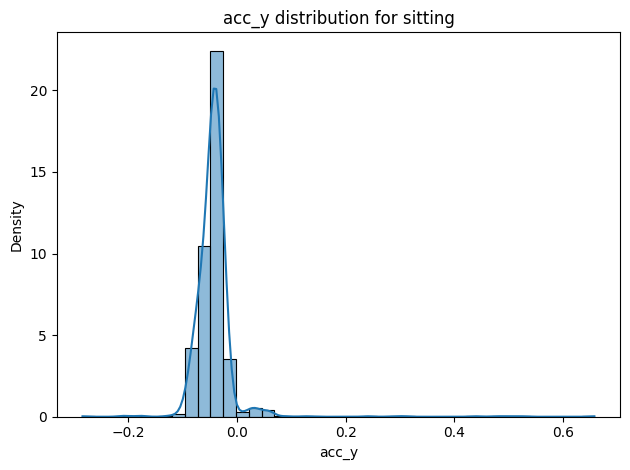

  acc_z                | Skew: -0.223 | Kurtosis: 18.206 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


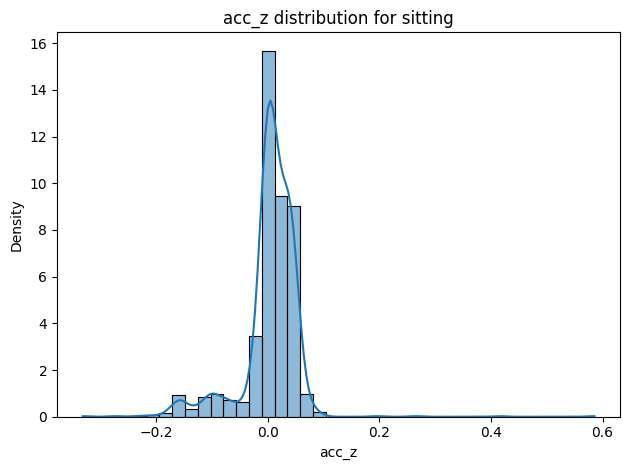


Activity: walking
  acc_x                | Skew: -3.366 | Kurtosis: 24.658 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


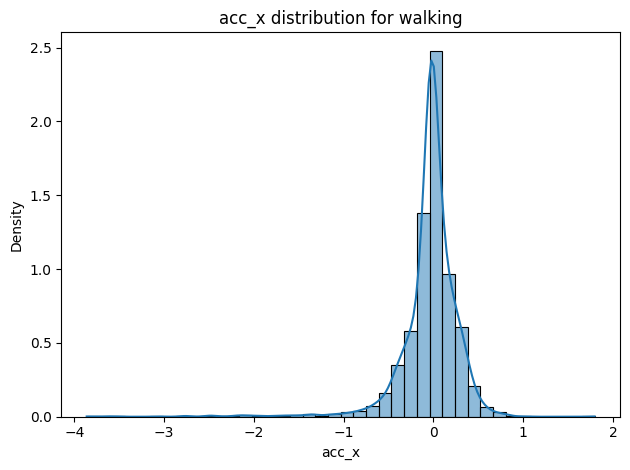

  acc_y                | Skew:  5.390 | Kurtosis: 51.997 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


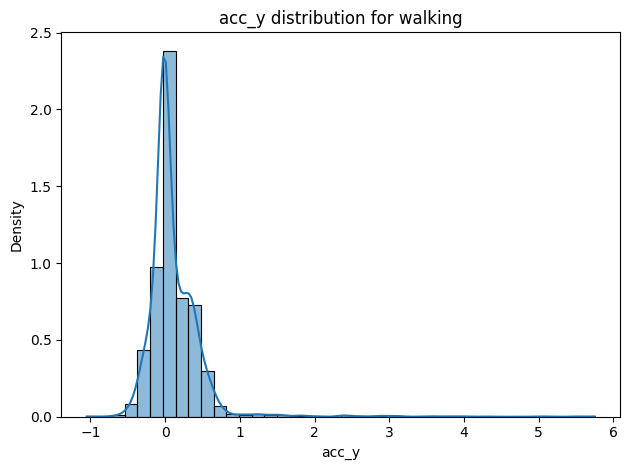

  acc_z                | Skew: -1.129 | Kurtosis:  7.952 | Shapiro-W p: 0.0000 | Method: Robust (IQR/IsolationForest)


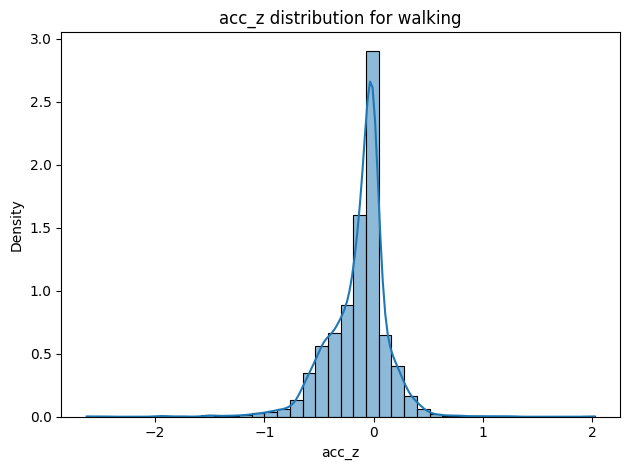

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, skew, kurtosis
import pandas as pd

# Sensor columns to analyze
sensor_axes = ['acc_x', 'acc_y', 'acc_z']

# Unique activities
activities = df['activity'].dropna().unique()

# Thresholds
SHAPIRO_P_THRESHOLD = 0.05
SKEW_THRESHOLD = 1.0
KURTOSIS_THRESHOLD = 5.0

results = []

for activity in activities:
    df_activity = df[df['activity'] == activity]

    print(f"\nActivity: {activity}")
    
    for col in sensor_axes:
        data = df_activity[col].dropna()
        if len(data) < 3:
            print(f"  {col:20s} | Not enough data")
            continue

        # Compute stats
        s = skew(data)
        k = kurtosis(data)
        p = shapiro(data.sample(5000) if len(data) > 5000 else data)[1]

        if p > SHAPIRO_P_THRESHOLD and abs(s) < SKEW_THRESHOLD and abs(k) < KURTOSIS_THRESHOLD:
            method = 'Chauvenet'
        else:
            method = 'Robust (IQR/IsolationForest)'

        print(f"  {col:20s} | Skew: {s:6.3f} | Kurtosis: {k:6.3f} | Shapiro-W p: {p:.4f} | Method: {method}")
        results.append({
            "Activity": activity,
            "Sensor": col,
            "Skewness": s,
            "Kurtosis": k,
            "Shapiro-W p-value": p,
            "Recommended Method": method
        })

        # Plot distribution
        sns.histplot(data, kde=True, stat="density", bins=40)
        plt.title(f"{col} distribution for {activity}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.tight_layout()
        plt.show()

# Convert results to DataFrame for inspection/export
results_df = pd.DataFrame(results)


In [202]:
len(df)

7511

In [217]:
from sklearn.ensemble import IsolationForest

# Choose your sensor column (example: acc_x)
col = 'acc_x'

contamination_values = [0.001, 0.005, 0.01, 0.02]
X = df[[col]].dropna()

for c in contamination_values:
    iso = IsolationForest(contamination=c, random_state=42)
    iso.fit(X)
    outliers = iso.predict(X) == -1
    print(f"Contamination: {c:.3f} -> Outliers detected: {outliers.sum()} out of {len(X)}")


Contamination: 0.001 -> Outliers detected: 8 out of 7511
Contamination: 0.005 -> Outliers detected: 38 out of 7511
Contamination: 0.010 -> Outliers detected: 76 out of 7511
Contamination: 0.020 -> Outliers detected: 151 out of 7511


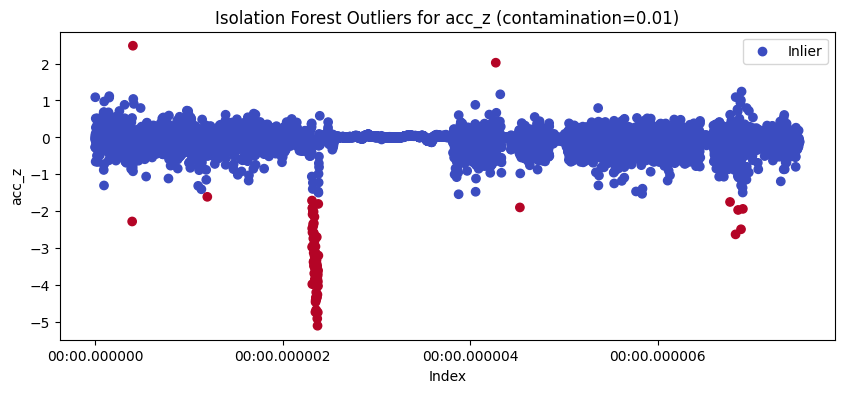

In [218]:
import matplotlib.pyplot as plt

iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X)
outliers = iso.predict(X) == -1

plt.figure(figsize=(10, 4))
plt.scatter(X.index, X[col], c=outliers, cmap='coolwarm', marker='o', label='Outliers (red)')
plt.title(f'Isolation Forest Outliers for {col} (contamination=0.01)')
plt.xlabel('Index')
plt.ylabel(col)
plt.legend(['Inlier', 'Outlier'])
plt.show()


In [250]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

# Sensor axes to use (you can change to any others)
sensor_axes = ['acc_x','acc_y','acc_z']

# Copy the dataframe to avoid changing the original
df_isoforest = df.copy()

# Initialize column
df_isoforest['isoforest_outlier'] = np.nan

# Loop over each activity
for activity in df_isoforest['activity'].dropna().unique():
    df_act = df_isoforest[df_isoforest['activity'] == activity]
    X = df_act[sensor_axes].dropna()

    # Avoid tiny sets
    if len(X) < 10:
        print(f"Skipping {activity} due to low sample size.")
        continue

    # Train Isolation Forest
    iso = IsolationForest(contamination=0.01, random_state=42)
    preds = iso.fit_predict(X)  # -1 = outlier, 1 = inlier

    # Map back to original index
    df_isoforest.loc[X.index, 'isoforest_outlier'] = (preds == -1).astype(int)

print("✅ Isolation Forest outlier detection complete.")


✅ Isolation Forest outlier detection complete.


In [240]:
outlier_summary = df_isoforest.groupby('activity')['isoforest_outlier'].value_counts().unstack().fillna(0)
outlier_summary.columns = ['normal', 'outlier']
outlier_summary['% outliers'] = 100 * outlier_summary['outlier'] / (outlier_summary['normal'] + outlier_summary['outlier'])
print(outlier_summary.sort_values('% outliers', ascending=False))


          normal  outlier  % outliers
activity                             
running      551        6       1.077
sitting     1411       15       1.052
dance       1420       15       1.045
cycling      393        4       1.008
walking     3659       37       1.001


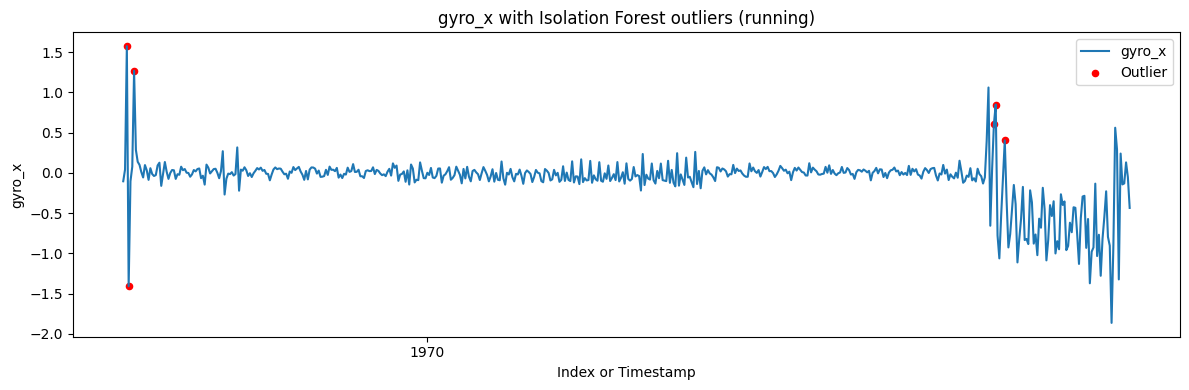

In [249]:
import matplotlib.pyplot as plt

activity = 'running'  # replace with any
col = 'gyro_x'

subset = df_isoforest[df_isoforest['activity'] == activity].copy()
subset = subset.dropna(subset=[col, 'isoforest_outlier'])

plt.figure(figsize=(12, 4))
plt.plot(subset.index, subset[col], label=col)
plt.scatter(
    subset[subset['isoforest_outlier'] == 1].index,
    subset[subset['isoforest_outlier'] == 1][col],
    color='red', label='Outlier', s=20
)
plt.title(f'{col} with Isolation Forest outliers ({activity})')
plt.legend()
plt.xlabel('Index or Timestamp')
plt.ylabel(col)
plt.tight_layout()
plt.show()


In [247]:
# Remove all rows with any outlier in any sensor column
df_no_outliers = df[~df['any_outlier']].copy()

# Now df_no_outliers contains only "clean" rows without outliers

In [248]:
print("Number of instances BEFORE accelerometer outlier detection=: ", len(df))
print("Number of instances AFTER accelerometer outlier detection=: ", len(df_no_outliers))

Number of instances BEFORE accelerometer outlier detection=:  7511
Number of instances AFTER accelerometer outlier detection=:  7060


Preparing the dataset for imputation

In [261]:
df = pd.read_csv('intermediate_datafiles/16_06_dataset.csv')
df.columns

Index(['index', 'acc_z', 'acc_y', 'acc_x', 'gyro_z', 'gyro_y', 'gyro_x',
       'grav_z', 'grav_y', 'grav_x', 'wrist_rotationRateX',
       'wrist_rotationRateY', 'wrist_rotationRateZ', 'wrist_gravityX',
       'wrist_gravityY', 'wrist_gravityZ', 'wrist_accelerationX',
       'wrist_accelerationY', 'wrist_accelerationZ', 'wrist_quaternionW',
       'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ',
       'heart_bpm', 'activity'],
      dtype='object')

In [265]:
df.activity.unique()

array(['cycling', 'dance', 'running', 'sitting', 'walking'], dtype=object)

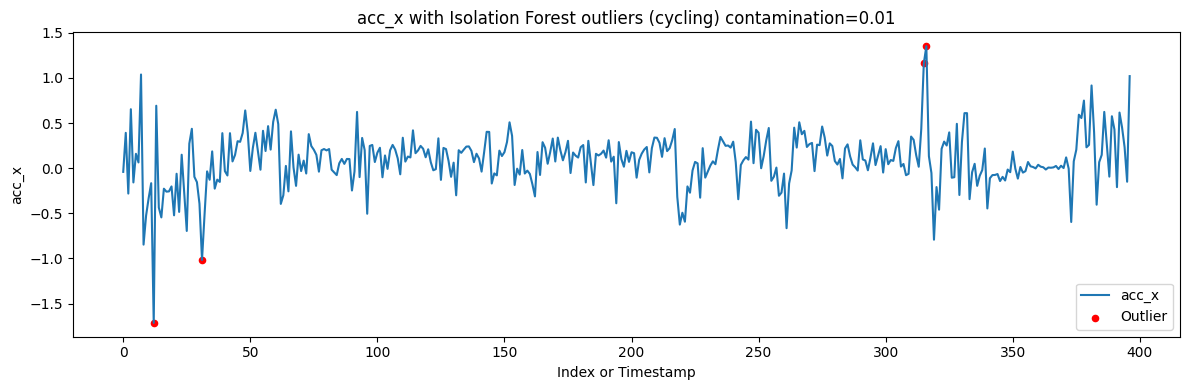

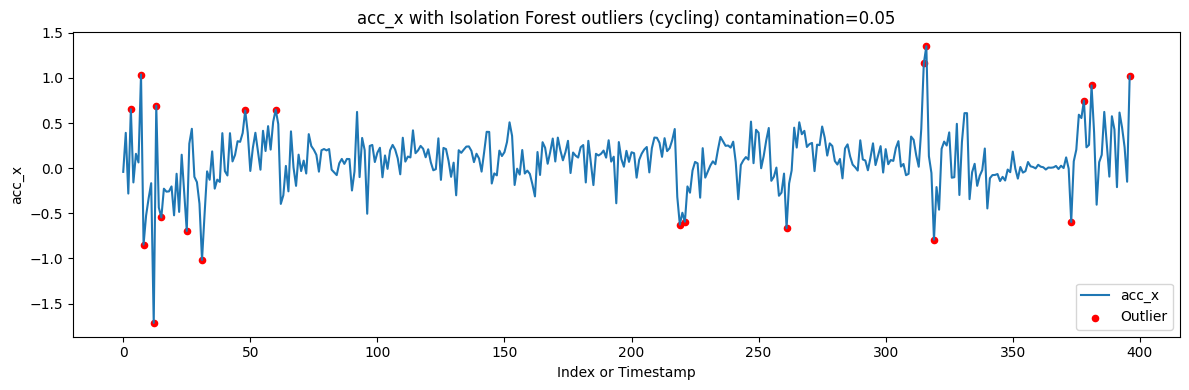

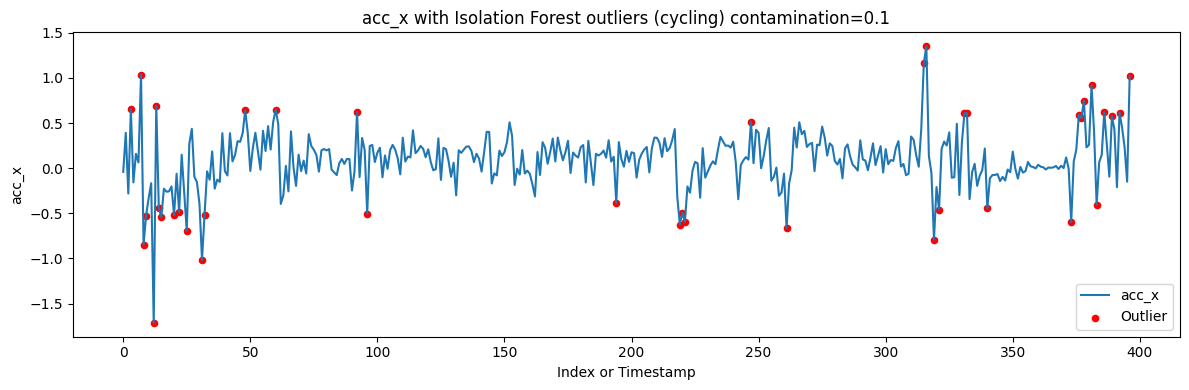

In [266]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

def plot_isolation_forest_outliers(df, activity, sensor_col, contamination=0.01):
    subset = df[df['activity'] == activity].copy()
    data = subset[sensor_col].dropna().values.reshape(-1, 1)
    
    iso = IsolationForest(contamination=contamination, random_state=42)
    iso.fit(data)
    
    # Predict outliers: -1 for outliers, 1 for inliers
    preds = iso.predict(data)
    
    # Create a mask for outliers
    outlier_mask = preds == -1
    
    plt.figure(figsize=(12, 4))
    plt.plot(subset.index, subset[sensor_col], label=sensor_col)
    plt.scatter(
        subset.index[outlier_mask],
        subset[sensor_col].dropna()[outlier_mask],
        color='red', label='Outlier', s=20
    )
    plt.title(f'{sensor_col} with Isolation Forest outliers ({activity}) contamination={contamination}')
    plt.legend()
    plt.xlabel('Index or Timestamp')
    plt.ylabel(sensor_col)
    plt.tight_layout()
    plt.show()


# To compare multiple contamination values, you could call the function repeatedly:
for c in [0.01, 0.05, 0.1]:
    plot_isolation_forest_outliers(df, 'cycling', 'acc_x', contamination=c)


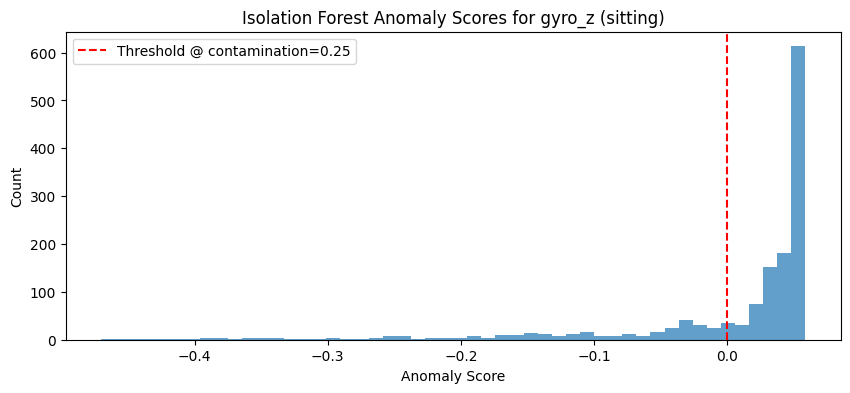

In [381]:
import numpy as np

def plot_iso_score_distribution(df, activity, sensor_col, contamination=0.01):
    subset = df[df['activity'] == activity].copy()
    data = subset[sensor_col].dropna().values.reshape(-1, 1)
    
    iso = IsolationForest(contamination=contamination, random_state=42)
    iso.fit(data)
    
    scores = iso.decision_function(data)  # Higher is more normal
    threshold = np.percentile(scores, 100 * contamination)
    
    plt.figure(figsize=(10, 4))
    plt.hist(scores, bins=50, alpha=0.7)
    plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold @ contamination={contamination}')
    plt.title(f'Isolation Forest Anomaly Scores for {sensor_col} ({activity})')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
#plot_iso_score_distribution(df, activity='cycling', sensor_col='acc_x', contamination=0.045)
#plot_iso_score_distribution(df, activity='cycling', sensor_col='acc_y', contamination=0.058)
#plot_iso_score_distribution(df, activity='cycling', sensor_col='acc_z', contamination=0.0425)
#plot_iso_score_distribution(df, activity='dance', sensor_col='acc_x', contamination=0.06)
#plot_iso_score_distribution(df, activity='dance', sensor_col='acc_y', contamination=0.04899)
#plot_iso_score_distribution(df, activity='dance', sensor_col='acc_z', contamination=0.062)
#plot_iso_score_distribution(df, activity='sitting', sensor_col='acc_x', contamination=0.15)
#plot_iso_score_distribution(df, activity='sitting', sensor_col='acc_y', contamination=0.15)
#plot_iso_score_distribution(df, activity='sitting', sensor_col='acc_z', contamination=0.2)
#plot_iso_score_distribution(df, activity='walking', sensor_col='acc_x', contamination=0.15)
#plot_iso_score_distribution(df, activity='walking', sensor_col='acc_y', contamination=0.1)
#plot_iso_score_distribution(df, activity='walking', sensor_col='acc_z', contamination=0.11)
#plot_iso_score_distribution(df, activity='running', sensor_col='acc_x', contamination=0.2)
#plot_iso_score_distribution(df, activity='running', sensor_col='acc_y', contamination=0.085)
#plot_iso_score_distribution(df, activity='running', sensor_col='acc_z', contamination=0.2)

#plot_iso_score_distribution(df, activity='cycling', sensor_col='gyro_x', contamination=0.15)
#plot_iso_score_distribution(df, activity='cycling', sensor_col='gyro_y', contamination=0.25)
#plot_iso_score_distribution(df, activity='cycling', sensor_col='gyro_z', contamination=0.13)
#plot_iso_score_distribution(df, activity='dance', sensor_col='gyro_x', contamination=0.17)
#plot_iso_score_distribution(df, activity='dance', sensor_col='gyro_y', contamination=0.21)
#plot_iso_score_distribution(df, activity='dance', sensor_col='gyro_z', contamination=0.16)
#plot_iso_score_distribution(df, activity='sitting', sensor_col='gyro_x', contamination=0.16)
#plot_iso_score_distribution(df, activity='sitting', sensor_col='gyro_y', contamination=0.2)
#plot_iso_score_distribution(df, activity='sitting', sensor_col='gyro_z', contamination=0.25)



In [352]:


def flag_and_nan_outliers(df, sensor_col, activity=None, contamination=0.01, random_state=42):
    """
    Detect outliers in a specific sensor column (optionally for a specific activity),
    flag them, and replace the outlier values with NaN for later imputation.
    
    Parameters:
        df (pd.DataFrame): The full dataset.
        sensor_col (str): Sensor column to analyze (e.g., 'acc_x').
        activity (str or None): Activity to filter on (e.g., 'cycling'). Use None for all data.
        contamination (float): Expected proportion of outliers.
        random_state (int): Random seed for reproducibility.
    
    Returns:
        df_out (pd.DataFrame): Copy of the original DataFrame with:
            - a new boolean outlier flag column '<sensor_col>_outlier' (1=outlier, 0=normal)
            - outlier values in sensor_col replaced by NaN
    """
    
    df_out = df.copy()
    
    # Filter rows for activity if specified
    if activity is not None:
        idx = df_out[df_out['activity'] == activity].index
        print(f"Flagging outliers for activity '{activity}' with {len(idx)} rows")
    else:
        idx = df_out.index
        print(f"Flagging outliers for all data with {len(idx)} rows")
    
    # Data for fitting
    data_for_fit = df_out.loc[idx, sensor_col].dropna()
    if data_for_fit.empty:
        print(f"No valid data found for sensor '{sensor_col}' with activity '{activity}'")
        return df_out
    
    # Isolation Forest expects 2D input
    X = data_for_fit.values.reshape(-1, 1)
    
    iso = IsolationForest(contamination=contamination, random_state=random_state)
    iso.fit(X)
    
    preds = iso.predict(X)  # -1 = outlier, 1 = normal
    outlier_flags = (preds == -1).astype(int)
    
    # Create a new outlier flag column, default 0
    flag_col = f"{sensor_col}_outlier"
    if flag_col not in df_out.columns:
        df_out[flag_col] = 0
    
    # Assign flags only to filtered rows (matching non-NaN sensor data indices)
    outlier_idx = data_for_fit.index[outlier_flags == 1]
    df_out.loc[outlier_idx, flag_col] = 1
    
    # Replace outlier values in sensor_col with NaN for imputation later
    df_out.loc[outlier_idx, sensor_col] = pd.NA
    
    print(f"Outliers flagged and replaced with NaN: {len(outlier_idx)}")
    
    return df_out

# Example usage:
#df_new = flag_and_nan_outliers(df, sensor_col='acc_x', activity='cycling', contamination=0.01)


# Define all (activity, sensor_col, contamination) combinations
outlier_specs = [
    ('cycling', 'acc_x', 0.01),
    ('cycling', 'acc_y', 0.058),
    ('cycling', 'acc_z', 0.0425),
    ('dance', 'acc_x', 0.06),
    ('dance', 'acc_y', 0.04899),
    ('dance', 'acc_z', 0.062),
    ('sitting', 'acc_x', 0.15),
    ('sitting', 'acc_y', 0.15),
    ('sitting', 'acc_z', 0.2),
    ('walking', 'acc_x', 0.15),
    ('walking', 'acc_y', 0.1),
    ('walking', 'acc_z', 0.11),
    ('running', 'acc_x', 0.2),
    ('running', 'acc_y', 0.085),
    ('running', 'acc_z', 0.2)
]

# Start from the original DataFrame
#df_updated = df.copy()

# Apply Isolation Forest outlier detection for each combination
for activity, sensor_col, contamination in outlier_specs:
    df_updated = flag_and_nan_outliers(df_updated, sensor_col=sensor_col, activity=activity, contamination=contamination)


Flagging outliers for activity 'cycling' with 397 rows
Outliers flagged and replaced with NaN: 4
Flagging outliers for activity 'cycling' with 397 rows
Outliers flagged and replaced with NaN: 22
Flagging outliers for activity 'cycling' with 397 rows
Outliers flagged and replaced with NaN: 17
Flagging outliers for activity 'dance' with 1435 rows
Outliers flagged and replaced with NaN: 81
Flagging outliers for activity 'dance' with 1435 rows
Outliers flagged and replaced with NaN: 67
Flagging outliers for activity 'dance' with 1435 rows
Outliers flagged and replaced with NaN: 84
Flagging outliers for activity 'sitting' with 1426 rows
Outliers flagged and replaced with NaN: 182
Flagging outliers for activity 'sitting' with 1426 rows
Outliers flagged and replaced with NaN: 182
Flagging outliers for activity 'sitting' with 1426 rows
Outliers flagged and replaced with NaN: 228
Flagging outliers for activity 'walking' with 3696 rows
Outliers flagged and replaced with NaN: 472
Flagging outlier

In [509]:
df.columns

Index(['index', 'acc_z', 'acc_y', 'acc_x', 'gyro_z', 'gyro_y', 'gyro_x',
       'grav_z', 'grav_y', 'grav_x', 'wrist_rotationRateX',
       'wrist_rotationRateY', 'wrist_rotationRateZ', 'wrist_gravityX',
       'wrist_gravityY', 'wrist_gravityZ', 'wrist_accelerationX',
       'wrist_accelerationY', 'wrist_accelerationZ', 'wrist_quaternionW',
       'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ',
       'heart_bpm', 'activity', 'acc_x_kalman', 'acc_y_kalman',
       'acc_z_kalman'],
      dtype='object')

Accelerometer and gyroscope - Chauvenet + Ewma

In [649]:
sensor_column = "gyro_z"

In [650]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def chauvenet_criterion(df, col):
    data = df[col]
    N = len(data)
    mean = data.mean()
    std = data.std()

    # Calculate deviation in terms of standard deviations
    deviation = abs(data - mean) / std

    # Calculate the probability of the deviation or more extreme
    prob = 1 - norm.cdf(deviation)

    # Chauvenet's threshold
    criterion = 1.0 / (2 * N)

    # Mask outliers where prob < criterion
    outliers = prob < criterion

    # Mark outliers as NaN
    df_chauvenet = df.copy()
    df_chauvenet.loc[outliers, col] = np.nan

    return df_chauvenet

# Example with your dataframe and column 'acc_x'
df_chauvenet = chauvenet_criterion(df, sensor_column)


In [597]:
df_chauvenet[sensor_column].isna().sum()


np.int64(85)

In [651]:
import pandas as pd
import numpy as np

def ewma_impute(df, col, span=5):
    """
    Impute missing values using Exponential Weighted Moving Average (EWMA).

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        col (str): Column name to impute.
        span (int): The span parameter for EWMA (controls decay rate).

    Returns:
        pd.DataFrame: DataFrame with imputed column.
    """
    
    # Calculate EWMA ignoring NaNs for smoothing
    ewma_series = df_chauvenet[col].ewm(span=span, adjust=False).mean()
    
    # Fill NaNs with EWMA values
    df_chauvenet[col] = df_chauvenet[col].fillna(ewma_series)
    
    # If any NaNs remain at start (because EWMA can't fill initial NaNs), do backward fill as fallback
    df_chauvenet[col] = df_chauvenet[col].fillna(method='bfill')
    
    return df_chauvenet

# Example usage:
# Assuming 'df' is your DataFrame and 'acc_x' is the sensor column
df_ewma_imputed = ewma_impute(df, sensor_column, span=5)


/var/folders/zk/93g1cp6546gfbhh4wkf04p4c0000gn/T/ipykernel_48435/1594166643.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_chauvenet[col] = df_chauvenet[col].fillna(method='bfill')


Imputation 

In [514]:
import pandas as pd

class ImputationMissingValues:

    def impute_mean(self, dataset, col):
        dataset[col] = dataset[col].fillna(dataset[col].mean())
        return dataset

    def impute_median(self, dataset, col):
        dataset[col] = dataset[col].fillna(dataset[col].median())
        return dataset

    def impute_interpolate(self, dataset, col):
        dataset[col] = dataset[col].interpolate(method='linear')
        dataset[col] = dataset[col].fillna(method='bfill')  # For start of the series
        return dataset

    # General-purpose method for all columns using a method you choose
    def impute_multiple(self, dataset, columns, method='interpolate'):
        for col in columns:
            if dataset[col].isnull().sum() == 0:
                continue  # Skip columns with no missing values
            if method == 'mean':
                dataset = self.impute_mean(dataset, col)
            elif method == 'median':
                dataset = self.impute_median(dataset, col)
            elif method == 'interpolate':
                dataset = self.impute_interpolate(dataset, col)
            else:
                raise ValueError(f"Unknown imputation method: {method}")
        return dataset

# Choose columns to impute (e.g., all sensor columns)
sensor_columns = [col for col in df_chauvenet.columns if col not in ['label']]

# Create imputer
imputer = ImputationMissingValues()

# Impute missing values using interpolation
df_imputed = imputer.impute_multiple(df_chauvenet.copy(), sensor_columns, method='interpolate')

/var/folders/zk/93g1cp6546gfbhh4wkf04p4c0000gn/T/ipykernel_48435/675958753.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset[col] = dataset[col].fillna(method='bfill')  # For start of the series


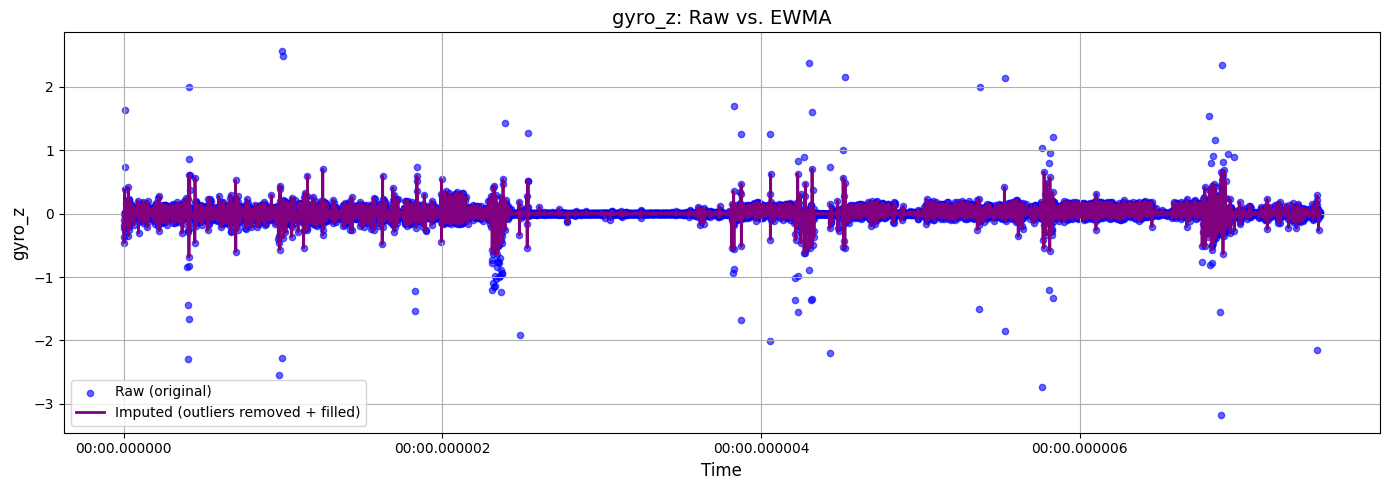

In [600]:
import matplotlib.pyplot as plt


# Masks for valid (non-NaN) raw points
valid_raw = df[sensor_column].notna()

plt.figure(figsize=(14, 5))

# Raw data (with outliers) as scatter dots
plt.scatter(df.index[valid_raw],
            df[sensor_column][valid_raw],
            label='Raw (original)', color='blue', alpha=0.6, s=20)

# Imputed data as a continuous line (should have no NaNs)
plt.plot(df_ewma_imputed.index,
         df_ewma_imputed[sensor_column],
         label='Imputed (outliers removed + filled)', color='purple', linewidth=2)

plt.title(f"{sensor_column}: Raw vs. EWMA", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel(sensor_column, fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Heart BPM

In [662]:
df_heart_rate = df_ewma_imputed

/var/folders/zk/93g1cp6546gfbhh4wkf04p4c0000gn/T/ipykernel_48435/3992267364.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_heart_rate['heart_bpm_interpolate'] = df_heart_rate['heart_bpm_clean'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


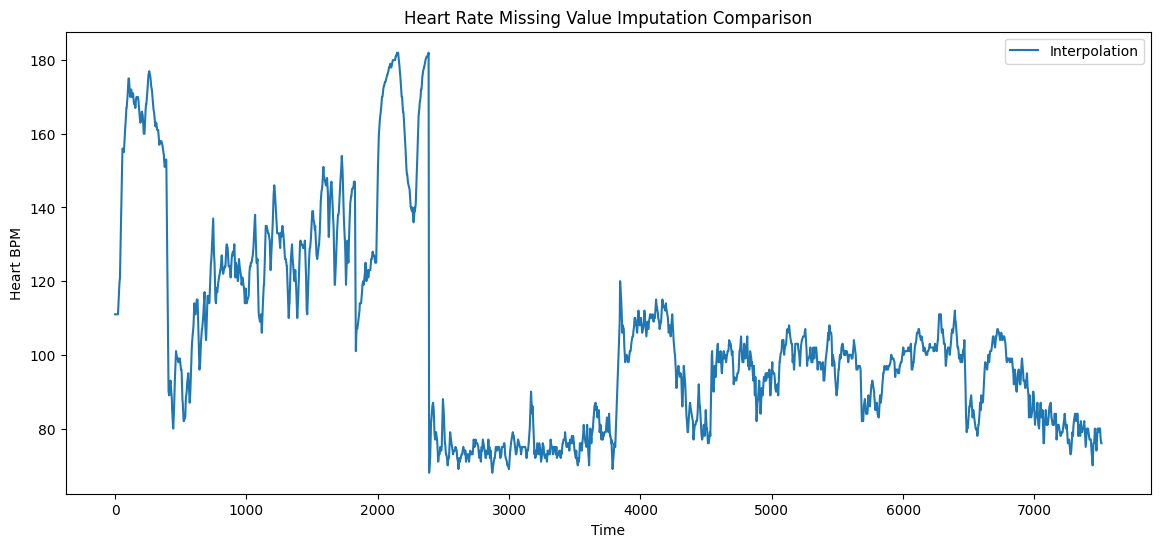

In [664]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Detect outliers in heart_bpm (e.g., remove implausible bpm <30 or >220)
df_heart_rate['heart_bpm_clean'] = df['heart_bpm']
df_heart_rate.loc[(df_heart_rate['heart_bpm_clean'] < 30) | (df_heart_rate['heart_bpm_clean'] > 220), 'heart_bpm_clean'] = np.nan

# Step 2: Impute missing values in two ways for comparison:
# (a) Mean imputation
mean_val = df_heart_rate['heart_bpm_clean'].mean()
df_heart_rate['heart_bpm_mean_impute'] = df_heart_rate['heart_bpm_clean'].fillna(mean_val)

# (b) Interpolation (linear)
df_heart_rate['heart_bpm_interpolate'] = df_heart_rate['heart_bpm_clean'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# Step 3: Plot original, mean imputed, and interpolated heart rate
plt.figure(figsize=(14, 6))
plt.plot(df_heart_rate.index, df_heart_rate['heart_bpm_interpolate'], label='Interpolation', linestyle='-')
plt.title('Heart Rate Missing Value Imputation Comparison')
plt.xlabel('Time')
plt.ylabel('Heart BPM')
plt.legend()
plt.show()


/var/folders/zk/93g1cp6546gfbhh4wkf04p4c0000gn/T/ipykernel_48435/3827385645.py:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/goran/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


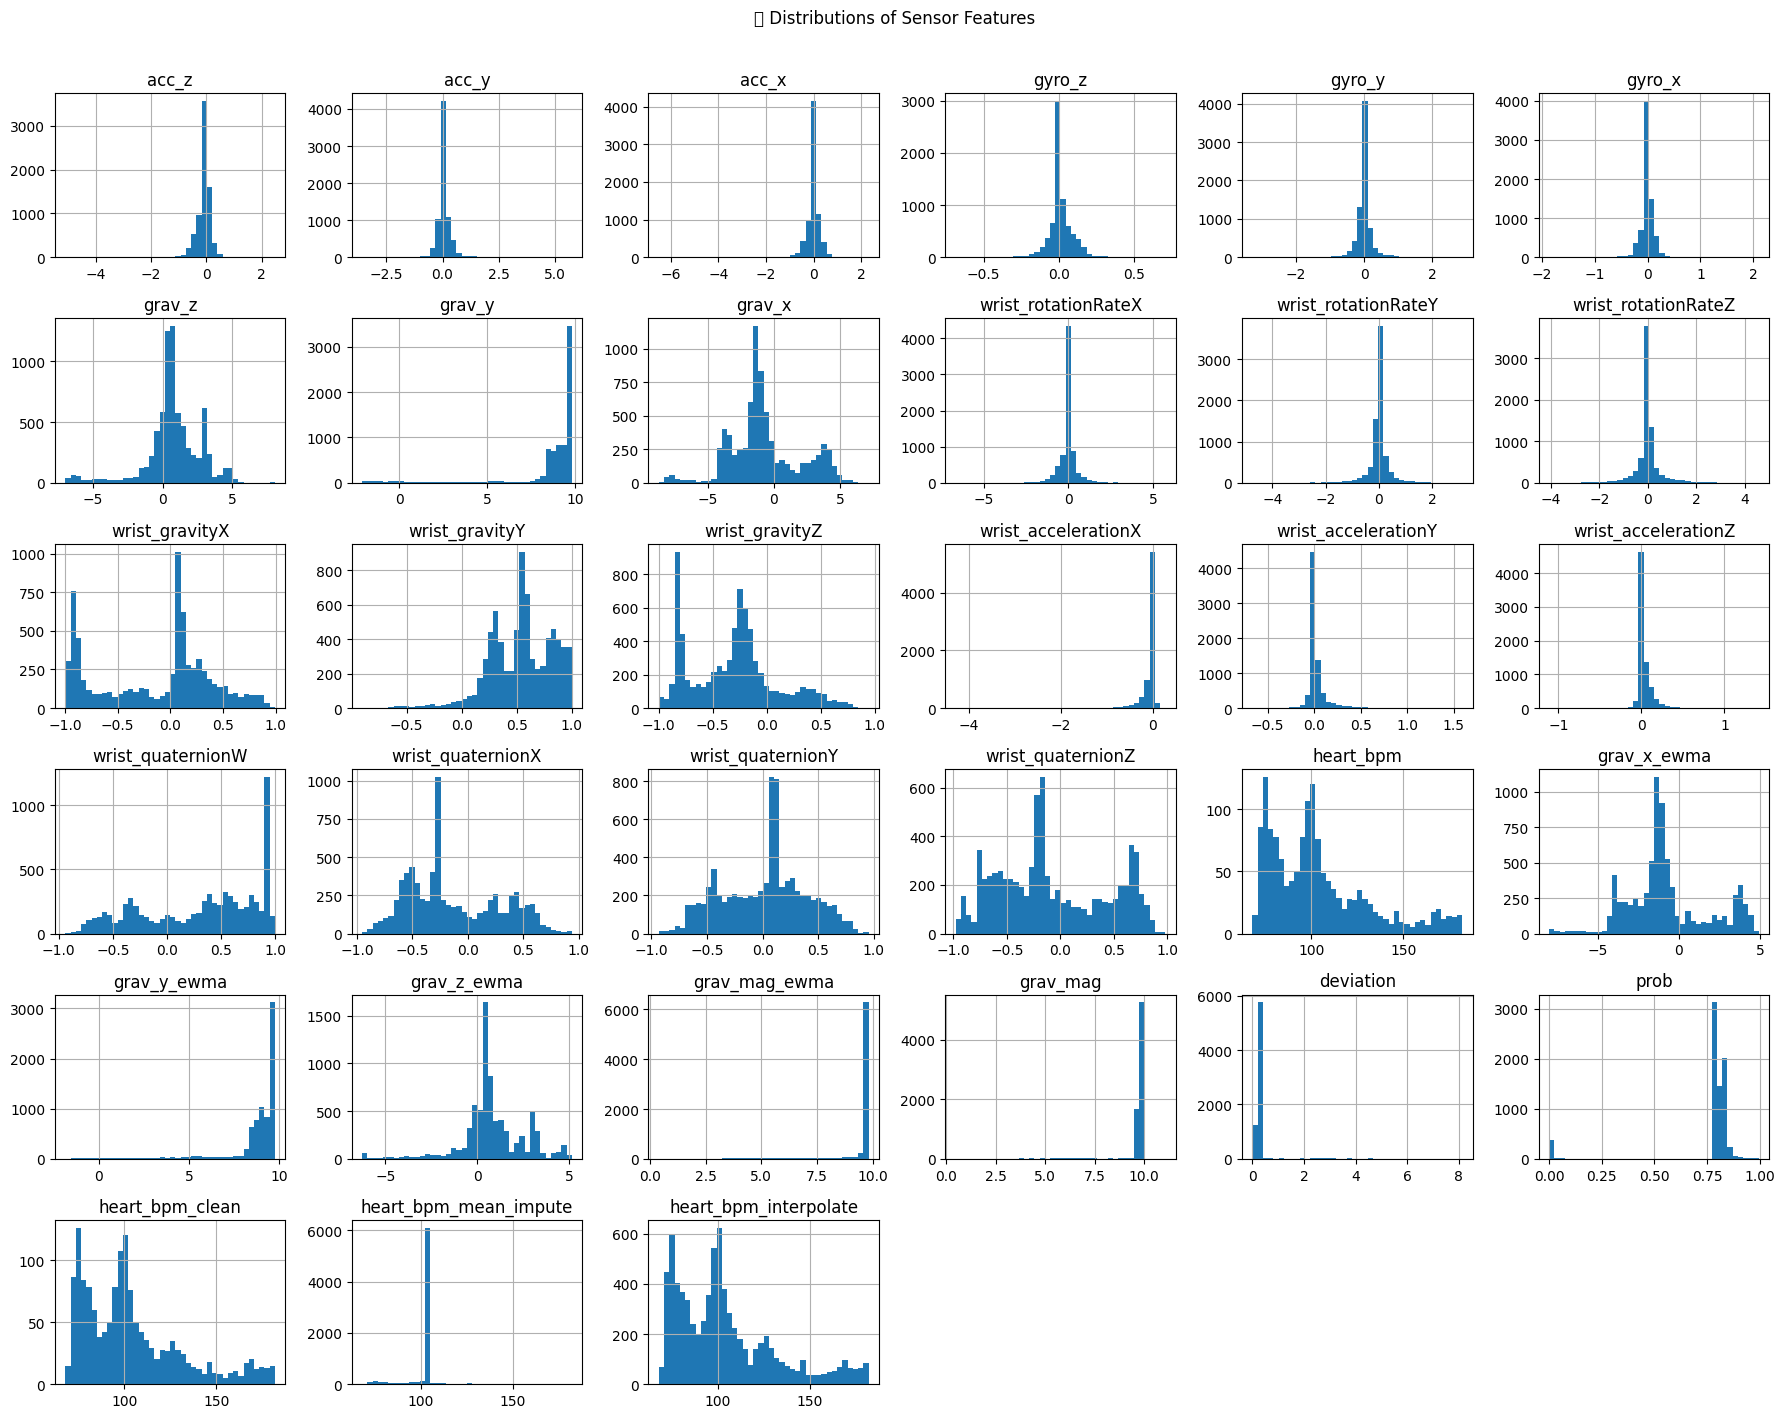

In [666]:
# Distribution of features
df_heart_rate.hist(figsize=(18, 14), bins=40)
plt.suptitle('📊 Distributions of Sensor Features', y=1.01)
plt.tight_layout()
plt.show()

In [694]:
columns_to_keep = [
  'index', 'acc_z', 'acc_y', 'acc_x', 'gyro_z', 'gyro_y', 'gyro_x',
  'grav_z', 'grav_y', 'grav_x', 'wrist_rotationRateX', 'wrist_rotationRateY', 'wrist_rotationRateZ',
  'wrist_gravityX', 'wrist_gravityY', 'wrist_gravityZ',
  'wrist_accelerationX', 'wrist_accelerationY', 'wrist_accelerationZ',
  'wrist_quaternionW', 'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ',
  'activity', 'heart_bpm_interpolate'
]

df_final = df_heart_rate[columns_to_keep].copy()

# Optional: check for missing values in the new df_final
print(df_final.isnull().sum())


index                     0
acc_z                     0
acc_y                     0
acc_x                     0
gyro_z                    0
gyro_y                    0
gyro_x                    0
grav_z                    0
grav_y                    0
grav_x                    0
wrist_rotationRateX      11
wrist_rotationRateY      11
wrist_rotationRateZ      11
wrist_gravityX           11
wrist_gravityY           11
wrist_gravityZ           11
wrist_accelerationX      11
wrist_accelerationY      11
wrist_accelerationZ      11
wrist_quaternionW        11
wrist_quaternionX        11
wrist_quaternionY        11
wrist_quaternionZ        11
activity                  0
heart_bpm_interpolate     0
dtype: int64


In [695]:
wrist_cols = [
    'wrist_rotationRateX', 'wrist_rotationRateY', 'wrist_rotationRateZ',
    'wrist_gravityX', 'wrist_gravityY', 'wrist_gravityZ',
    'wrist_accelerationX', 'wrist_accelerationY', 'wrist_accelerationZ',
    'wrist_quaternionW', 'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ'
]

df_final[wrist_cols] = df_final[wrist_cols].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

/var/folders/zk/93g1cp6546gfbhh4wkf04p4c0000gn/T/ipykernel_48435/1221218168.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final[wrist_cols] = df_final[wrist_cols].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


In [696]:
print(df_final.isnull().sum())

index                    0
acc_z                    0
acc_y                    0
acc_x                    0
gyro_z                   0
gyro_y                   0
gyro_x                   0
grav_z                   0
grav_y                   0
grav_x                   0
wrist_rotationRateX      0
wrist_rotationRateY      0
wrist_rotationRateZ      0
wrist_gravityX           0
wrist_gravityY           0
wrist_gravityZ           0
wrist_accelerationX      0
wrist_accelerationY      0
wrist_accelerationZ      0
wrist_quaternionW        0
wrist_quaternionX        0
wrist_quaternionY        0
wrist_quaternionZ        0
activity                 0
heart_bpm_interpolate    0
dtype: int64


/var/folders/zk/93g1cp6546gfbhh4wkf04p4c0000gn/T/ipykernel_48435/1885773566.py:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/goran/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


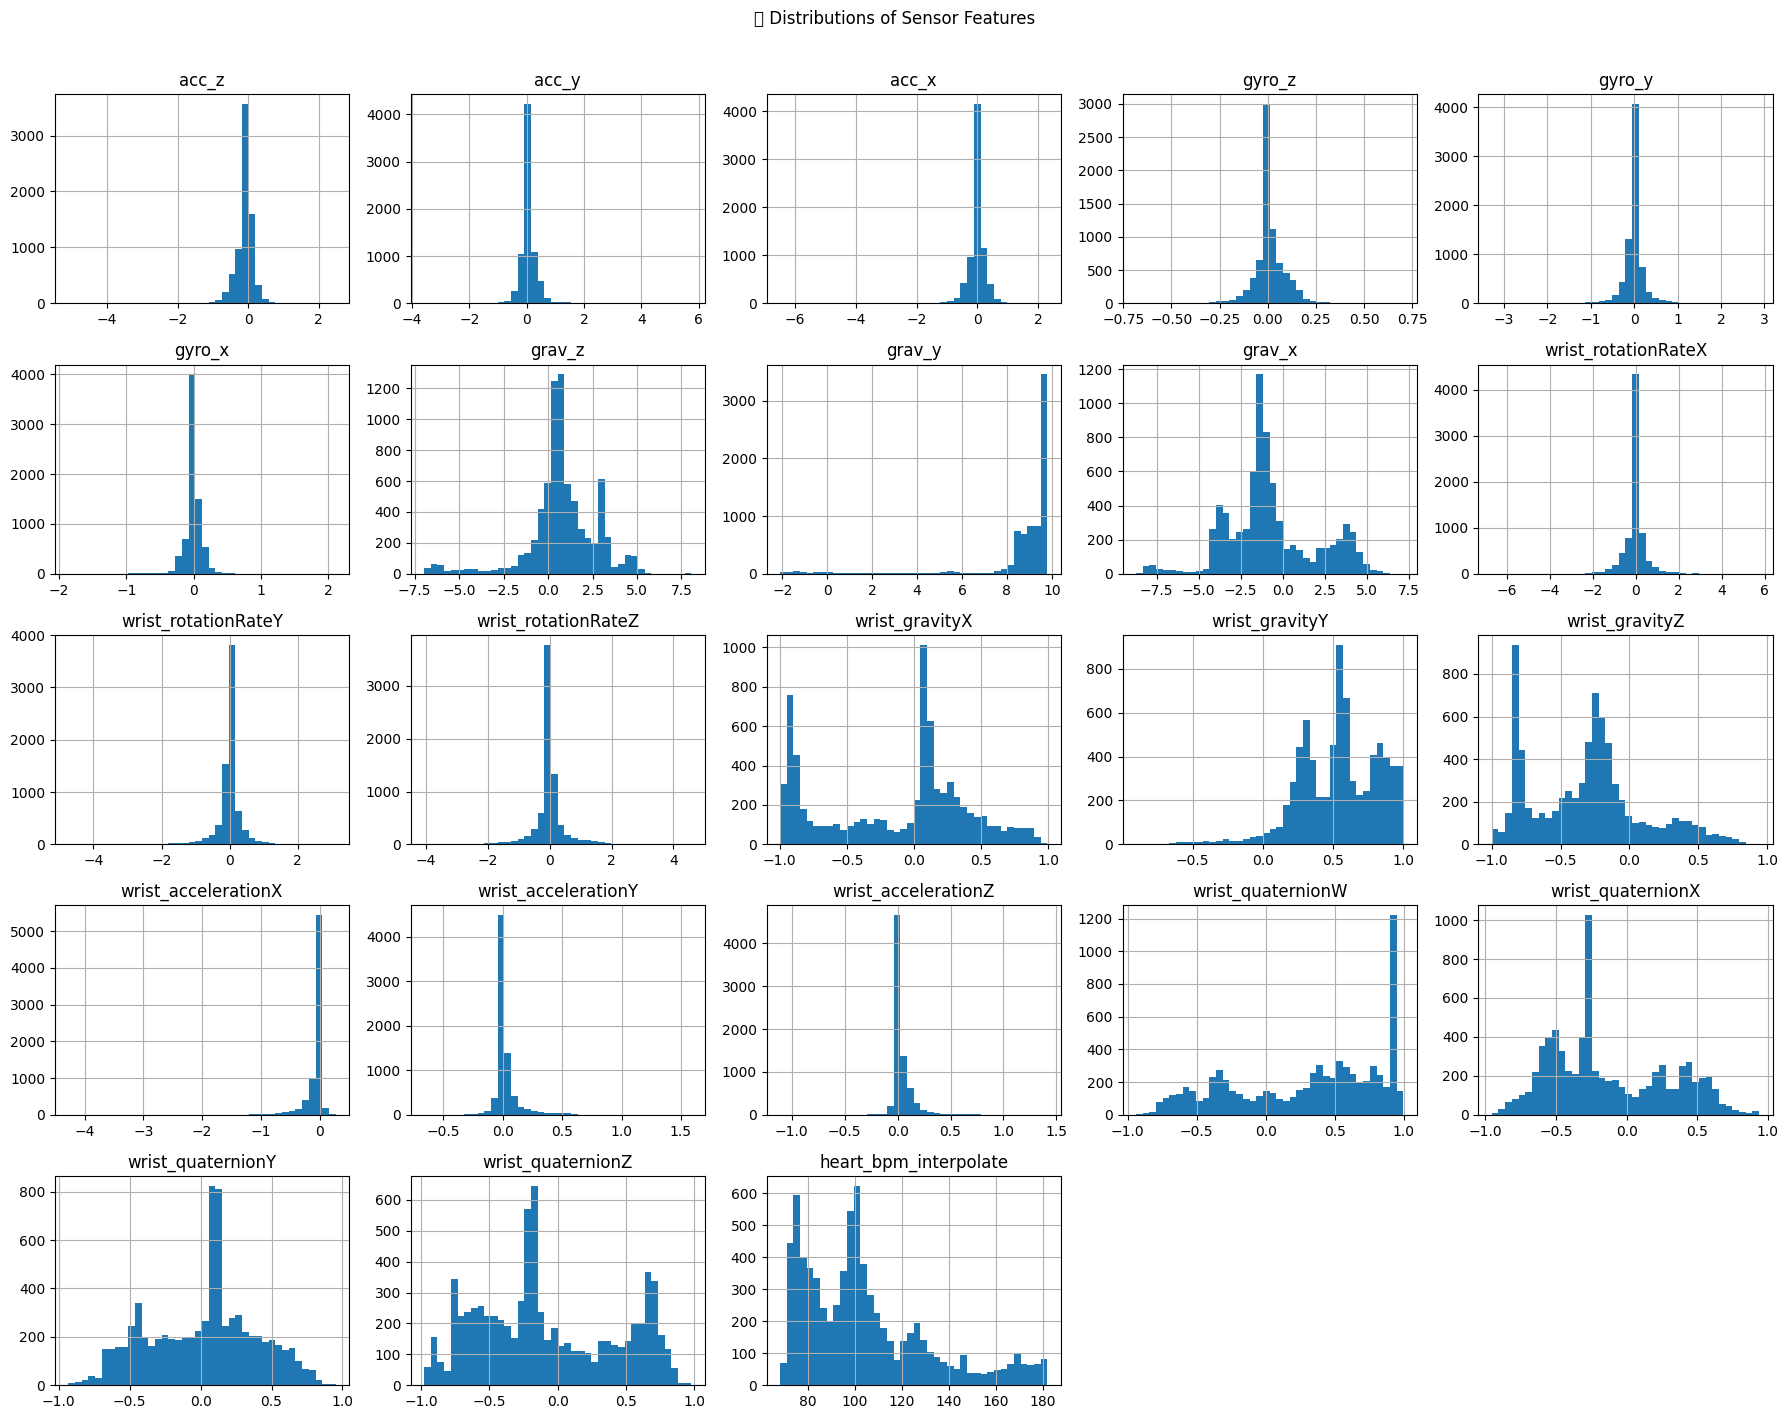

In [697]:
# Distribution of features
df_final.hist(figsize=(18, 14), bins=40)
plt.suptitle('📊 Distributions of Sensor Features', y=1.01)
plt.tight_layout()
plt.show()

PCA

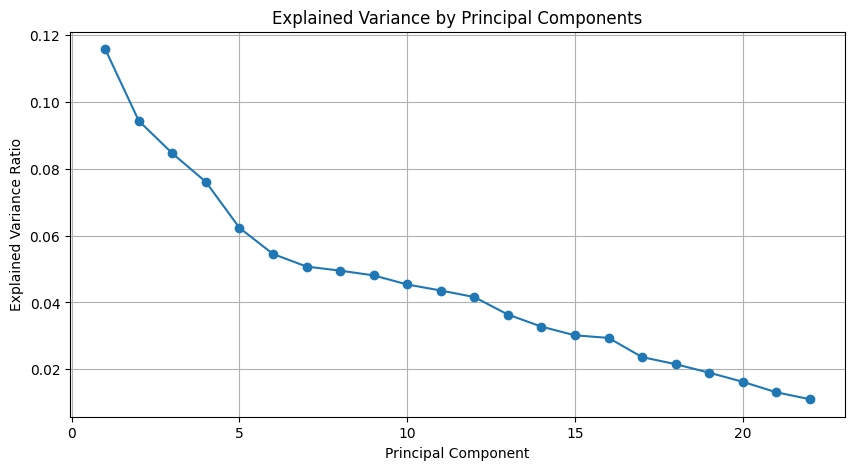

In [698]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize selected numeric columns
def normalize_dataset(df, cols):
    scaler = StandardScaler()
    df_copy = df.copy()
    df_copy[cols] = scaler.fit_transform(df[cols])
    return df_copy

# Select numeric columns (excluding heart rate and labels)
cols_for_pca = df_final.select_dtypes(include=[np.number]).columns.tolist()
cols_for_pca = [col for col in cols_for_pca if col != 'heart_bpm_interpolate']

# Normalize
df_norm = normalize_dataset(df_final, cols_for_pca)

# Fit PCA to all components
pca = PCA(n_components=len(cols_for_pca))
pca.fit(df_norm[cols_for_pca])
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


In [699]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select columns you want to include in PCA (excluding timestamp, label, heart_bpm)
cols = [col for col in df_final.columns if col not in ['index', 'activity', 'heart_bpm_interpolate']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final[cols])

# Fit PCA
pca = PCA(n_components=len(cols))
pca.fit(X_scaled)

# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.11580083 0.09435613 0.08462816 0.07607448 0.06233681 0.05451228
 0.05075027 0.04952609 0.04810419 0.04538234 0.04357929 0.04161914
 0.0363877  0.03277347 0.0301705  0.02939847 0.0236545  0.02153479
 0.01898925 0.01625845 0.01312197 0.01104087]


In [700]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize selected numeric columns
def normalize_dataset(df, cols):
    scaler = StandardScaler()
    df_copy = df.copy()
    df_copy[cols] = scaler.fit_transform(df[cols])
    return df_copy

# Select numeric columns (excluding heart rate and labels)
cols_for_pca = df_final.select_dtypes(include=[np.number]).columns.tolist()
cols_for_pca = [col for col in cols_for_pca if col != 'heart_bpm_interpolate']

# Normalize the selected columns
df_norm = normalize_dataset(df_final, cols_for_pca)

# Fit PCA with 12 components
pca_12 = PCA(n_components=12)
pca_12_result = pca_12.fit_transform(df_norm[cols_for_pca])

# Add PCA components to original dataframe
for i in range(12):
    df_final[f'pca_{i+1}'] = pca_12_result[:, i]

print("Added PCA components pca_1 to pca_12 to df_final.")


Added PCA components pca_1 to pca_12 to df_final.


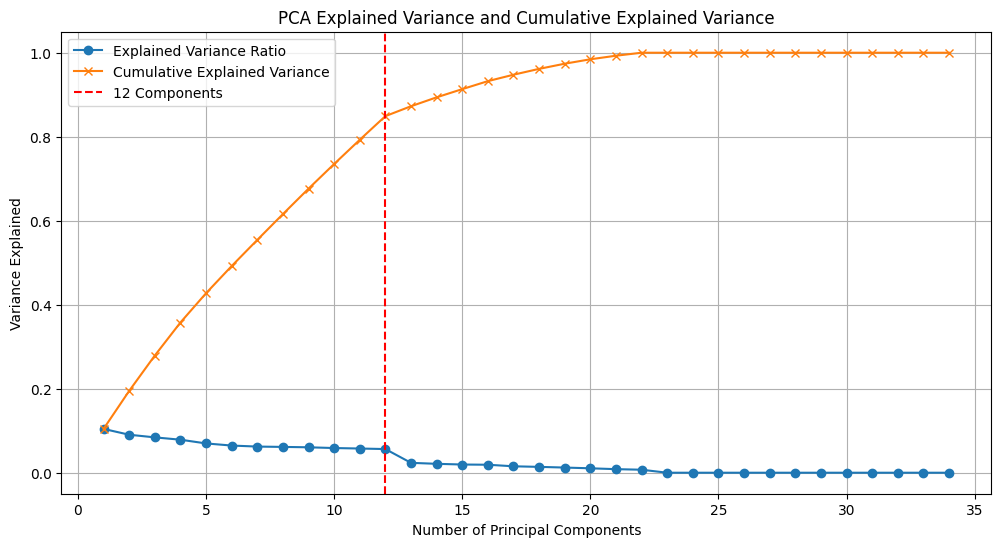

In [702]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize selected numeric columns
def normalize_dataset(df, cols):
    scaler = StandardScaler()
    df_copy = df.copy()
    df_copy[cols] = scaler.fit_transform(df[cols])
    return df_copy

# Select numeric columns (excluding heart rate and labels)
cols_for_pca = df_final.select_dtypes(include=[np.number]).columns.tolist()
cols_for_pca = [col for col in cols_for_pca if col != 'heart_bpm_interpolate']

# Normalize
df_norm = normalize_dataset(df_final, cols_for_pca)

# Fit PCA with all components
pca = PCA(n_components=len(cols_for_pca))
pca.fit(df_norm[cols_for_pca])

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance and cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='x', label='Cumulative Explained Variance')

# Mark the 12 components you want to keep
plt.axvline(x=12, color='r', linestyle='--', label='12 Components')

plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance and Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


In [703]:
df_final.columns

Index(['index', 'acc_z', 'acc_y', 'acc_x', 'gyro_z', 'gyro_y', 'gyro_x',
       'grav_z', 'grav_y', 'grav_x', 'wrist_rotationRateX',
       'wrist_rotationRateY', 'wrist_rotationRateZ', 'wrist_gravityX',
       'wrist_gravityY', 'wrist_gravityZ', 'wrist_accelerationX',
       'wrist_accelerationY', 'wrist_accelerationZ', 'wrist_quaternionW',
       'wrist_quaternionX', 'wrist_quaternionY', 'wrist_quaternionZ',
       'activity', 'heart_bpm_interpolate', 'pca_1', 'pca_2', 'pca_3', 'pca_4',
       'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11',
       'pca_12'],
      dtype='object')